In [ ]:
'''trying to reconstruct the dadi-opt pipeline
data file: data/dadi_opt_results_converged_updated & data/nn_results'''

In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import sys
import math
import numpy as np
import dadi
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import plotting
from plotting import plot_accuracy_multi_data, plot_accuracy_multi
import data_manip
from data_manip import generating_data

In [2]:
# this dict is of form
# {true: [pred1, pred2, pred3], true: [pred1, pred2, pred3]...}, length 50
# dict_dadi_results = pickle.load(open('data/dadi_opt/dadi_opt_results_converged_updated', 'rb'))
# dict_dadi_results = pickle.load(open(
#     'data/dadi_opt/dadi_opt_results_converged_updated_lnt', 'rb'))
dict_dadi_results = pickle.load(open('data/dadi_opt/dadi_opt_results_converged_updated_1_50', 'rb'))



In [9]:
# len(dict_dadi_results)

50

In [3]:
# process data dict for plotting
list_true, list_pred = [], []
for k,v in dict_dadi_results.items():
    if v is not None:
        # list_true.append(k)
        # list_pred.append(v[0])

        list_true.append([math.log(k[0], 10), math.log(k[1], 10), k[2], k[3]])
        list_pred.append([math.log(v[0][0], 10), math.log(v[0][1], 10), v[0][2], v[0][3]])

In [4]:
# sort by params
y_true = np.array(list_true).T.tolist()
y_pred = np.array(list_pred).T.tolist()
# # sort by params
# y_true = np.array(list_true[:10]).T.tolist()
# y_pred = np.array(list_pred[:10]).T.tolist()

In [ ]:
# len(y_true) # 4 parameters

In [5]:
len(y_true[0]) # 44

45

In [ ]:
# y_true[0] # 44 true values of nu1

In [6]:
data = [[(y_true, y_pred)]]
# data = []
# for true, pred in zip(y_true, y_pred):
#     data.append([([true], [pred])])

In [ ]:
# for row in data:
#     for column in row:
#         # read data from input
#         param_true, param_pred = column
#         print(f'true: {param_true}')
#         print(f'pred: {param_pred}')

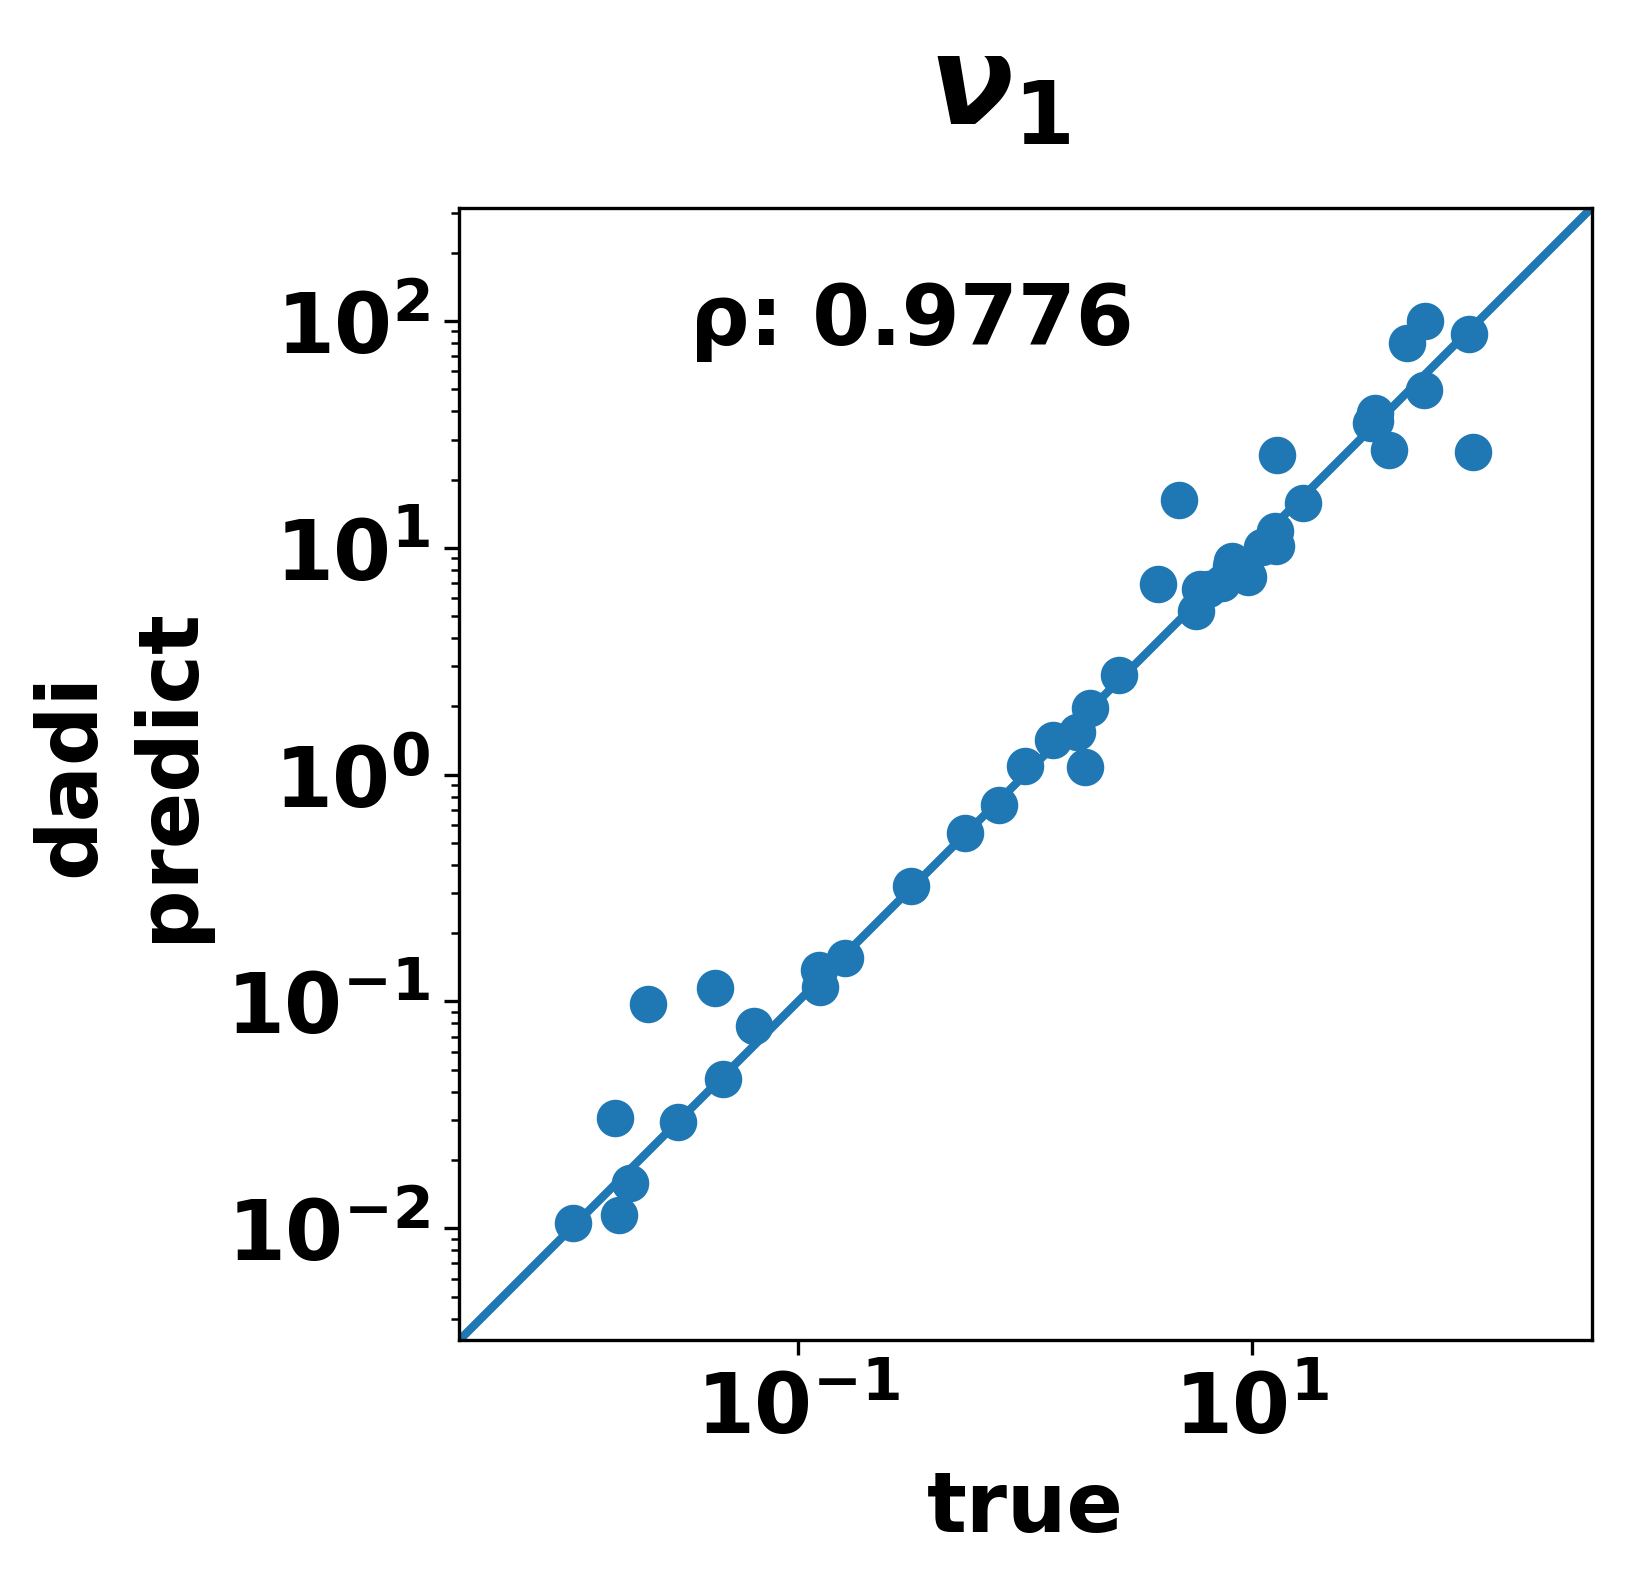

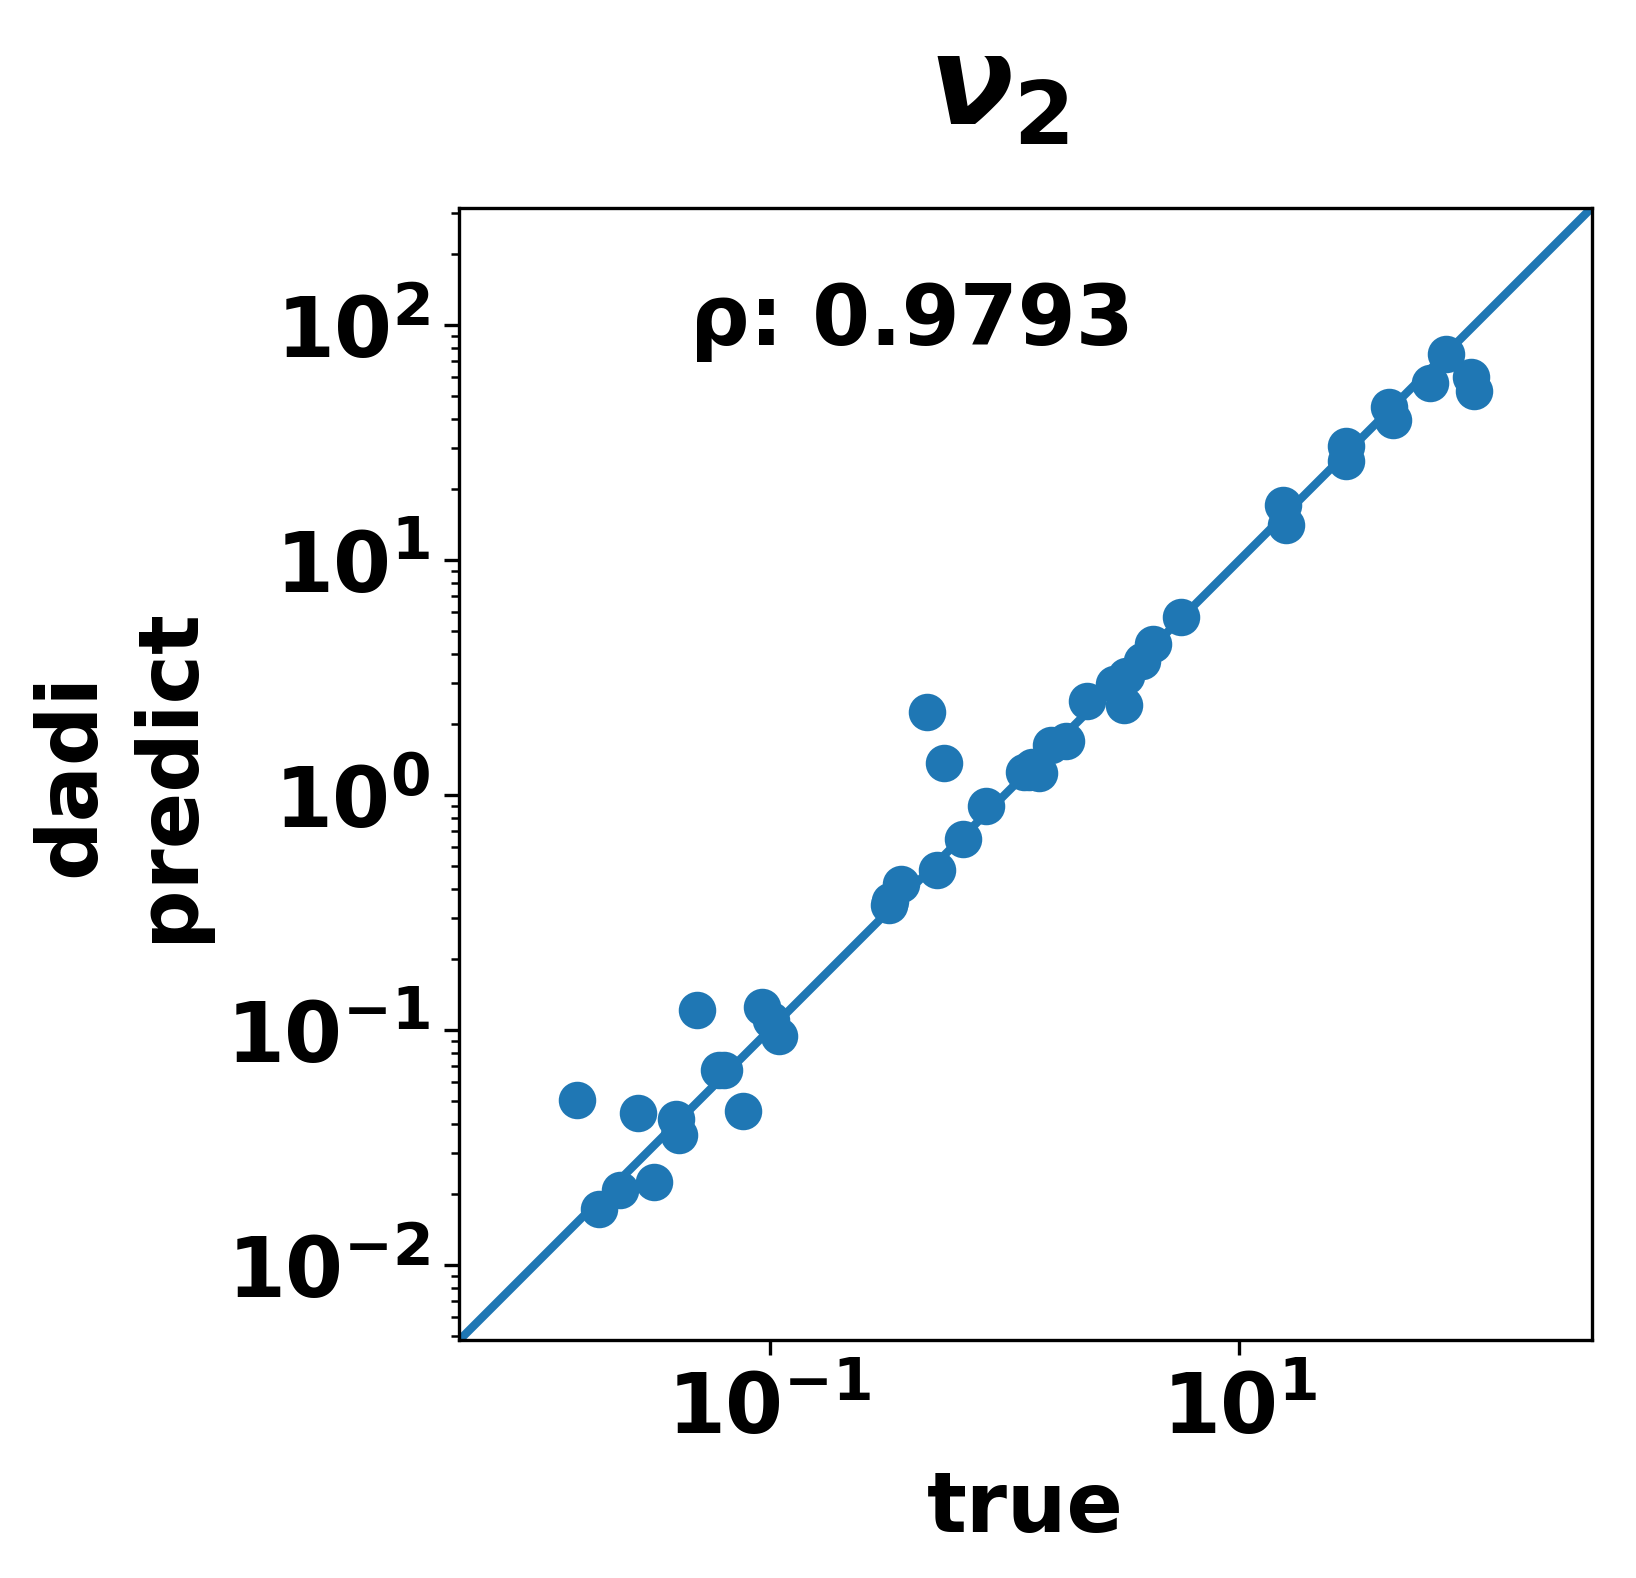

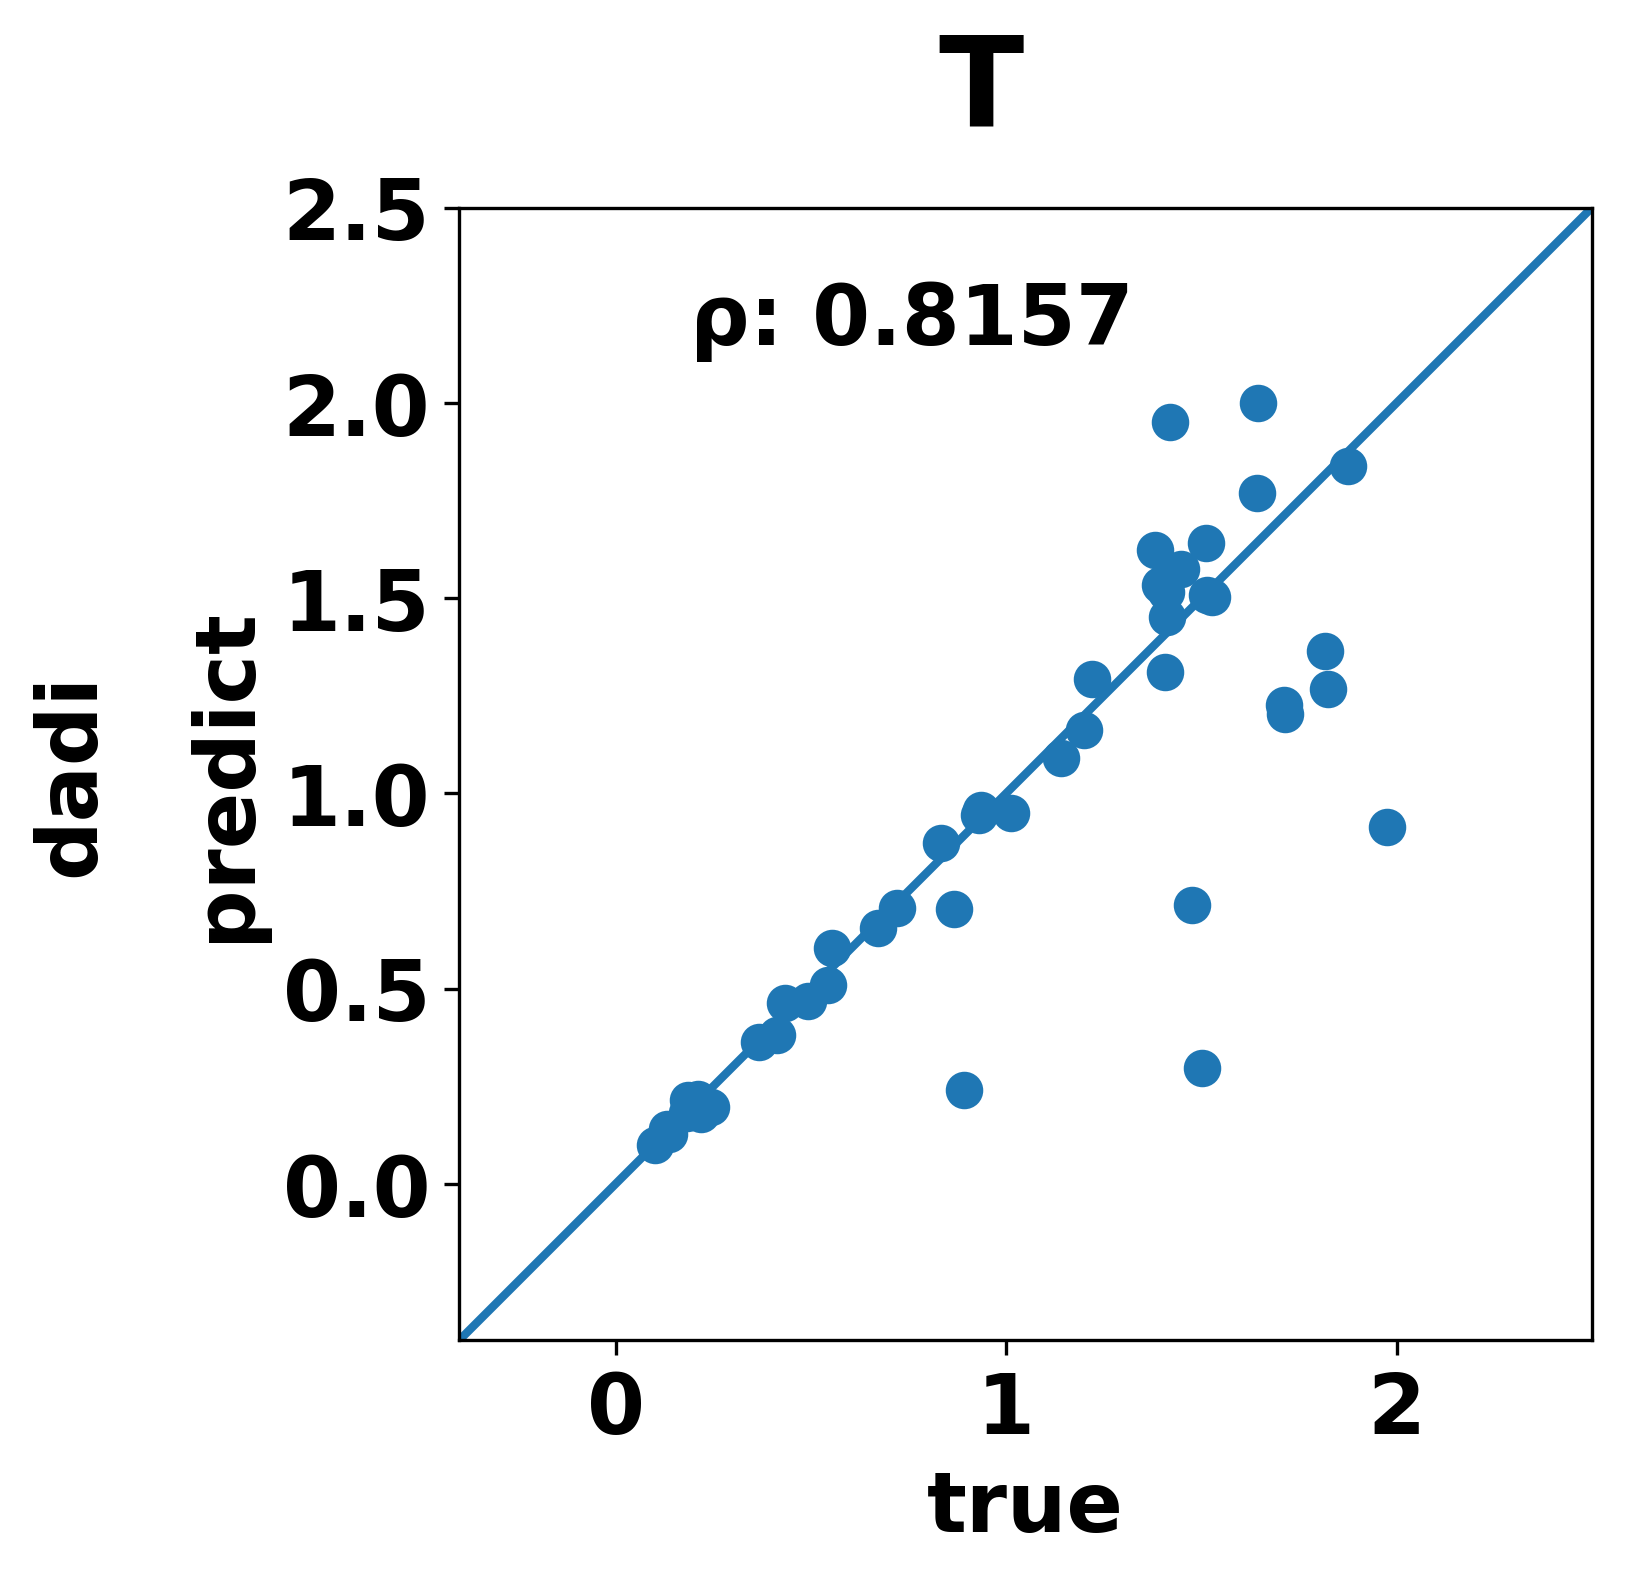

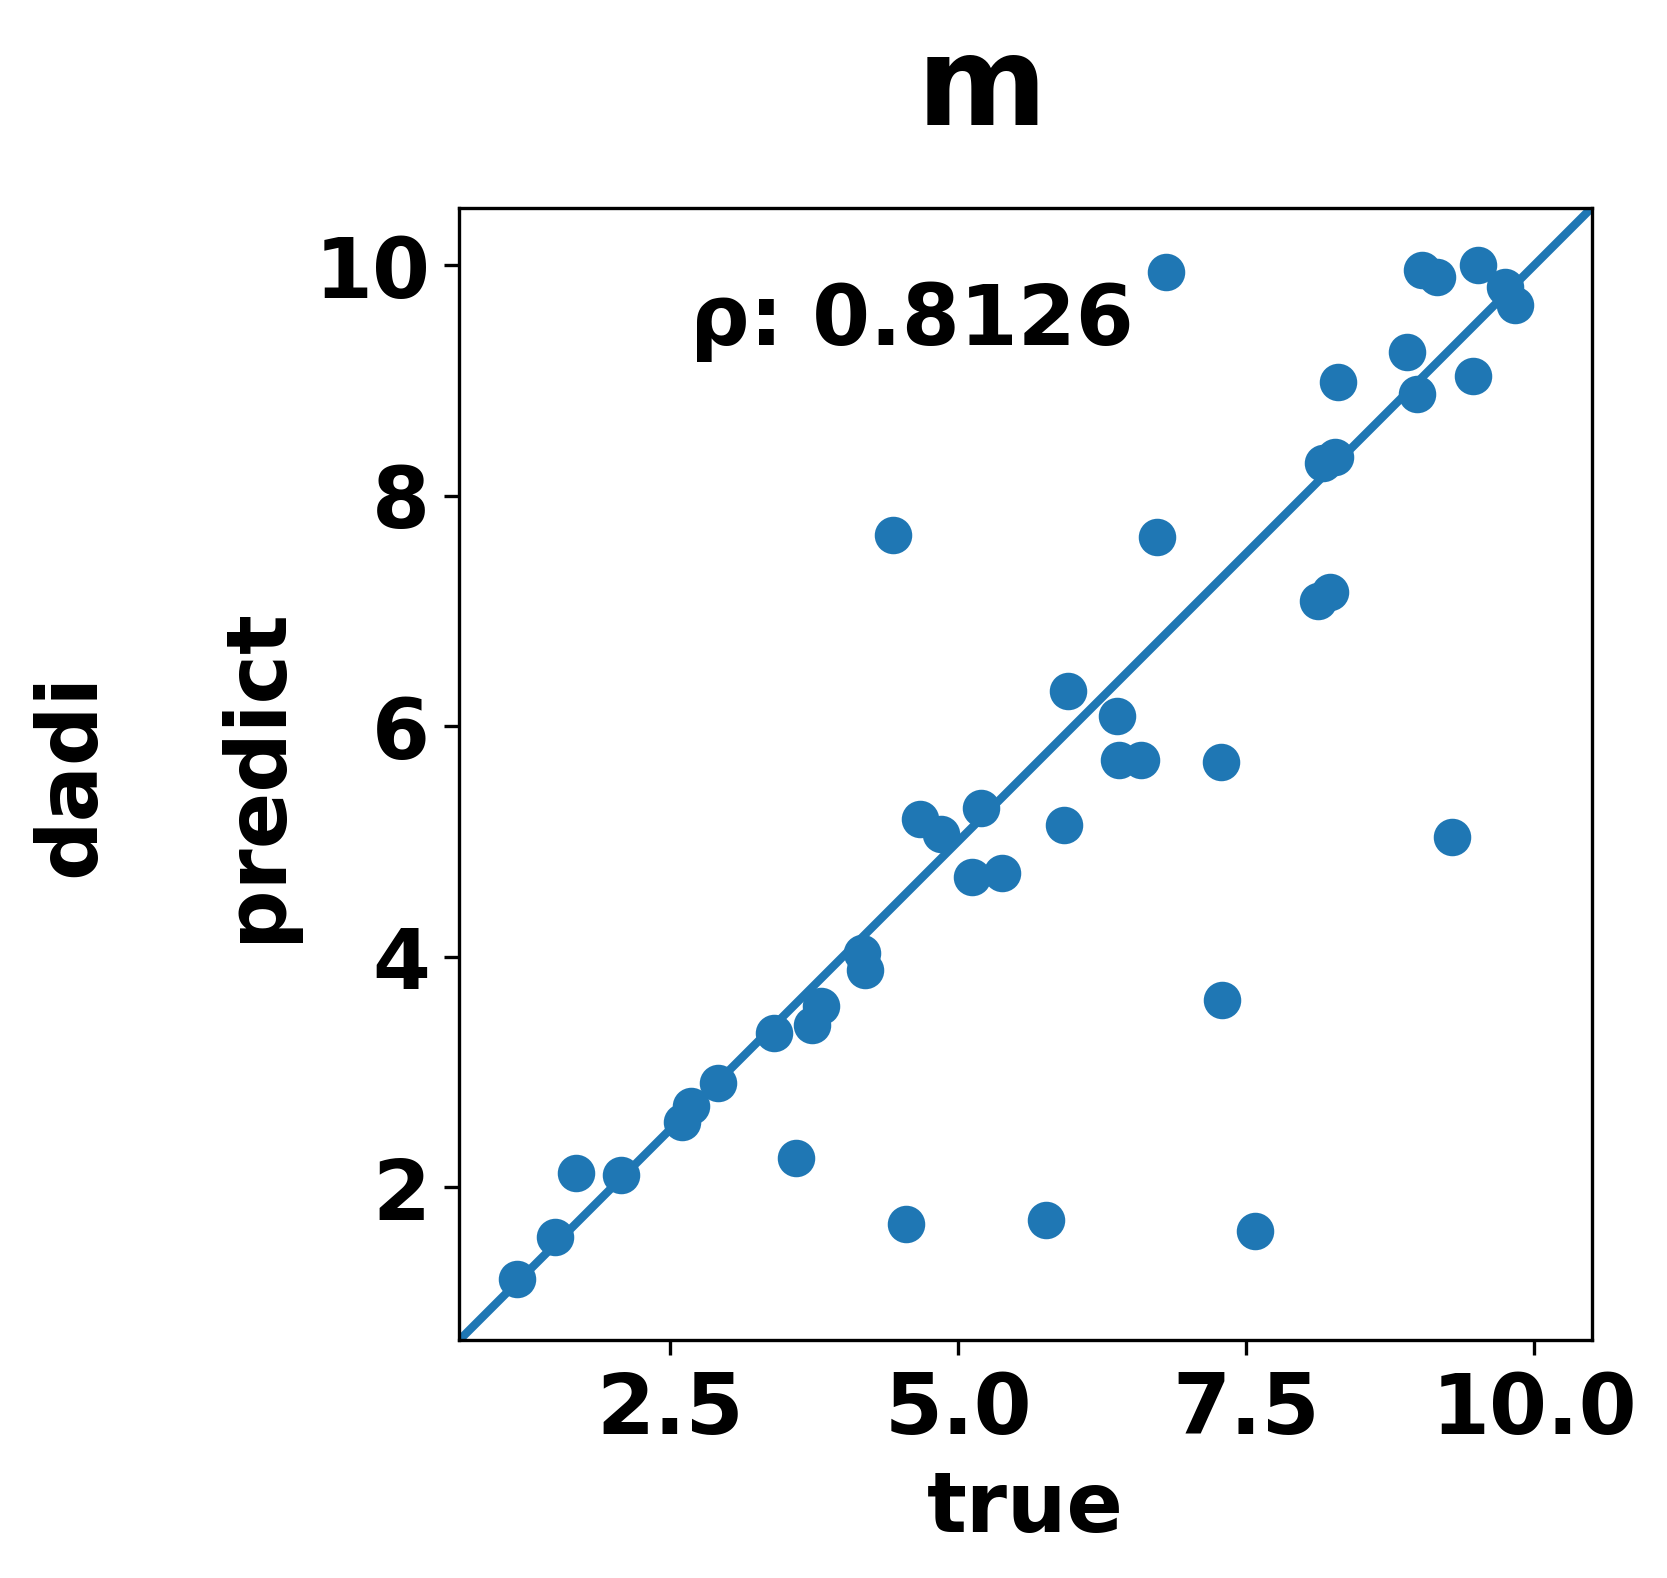

In [15]:
# Plot 1x4 dadi_opt for 2d_splitmig, tested on 44 theta=1000 fs
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
plot_accuracy_multi_data(data, logs, params,
                             size=((30, 20), (20, 80), (8, 2, 20), (5, 5)),
                             title=" ", x_label=None, y_label="dadi",
                             sub_x_label="true", sub_y_label="predict",
                             r2=False, msle=False, rho=True, c=False)
# # save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'data/dadi_opt/pres/{params[i]}_dadi.png')

In [18]:
# # regenerate test data based on the 44 used data sets
# # len(list_true)
# theta_list = [1000]
# func = dadi.Demographics2D.split_mig
# ns = [20,20]
# pts_l = [40, 50, 60]
# logs = [True, True, False, False]
# test_params = [tuple(true) for true in list_true]
# test_dict = generating_data(test_params, theta_list, func, ns, pts_l, logs)
# pickle.dump(test_dict, open('data/dadi_opt/test_data_1_50', 'wb'), 2)

In [8]:
# load test_dict
test_dict = pickle.load(open('data/dadi_opt/test_data_1_50', 'rb'))

In [9]:
list_mlpr_random = pickle.load(open('data/dadi_opt/list_mlpr_random', 'rb'))
mlpr_random_1 = pickle.load(open('data/dadi_opt/list_mlpr_random_5000_theta1', 'rb'))
# list_mlpr_connie_1 = pickle.load(open('data/dadi_opt/nn_trained_on_1', 'rb'))
# Conie's theta=1 is bugged
# list_mlpr_connie_1000 = pickle.load(open('data/dadi_opt/nn_trained_on_1000', 'rb'))

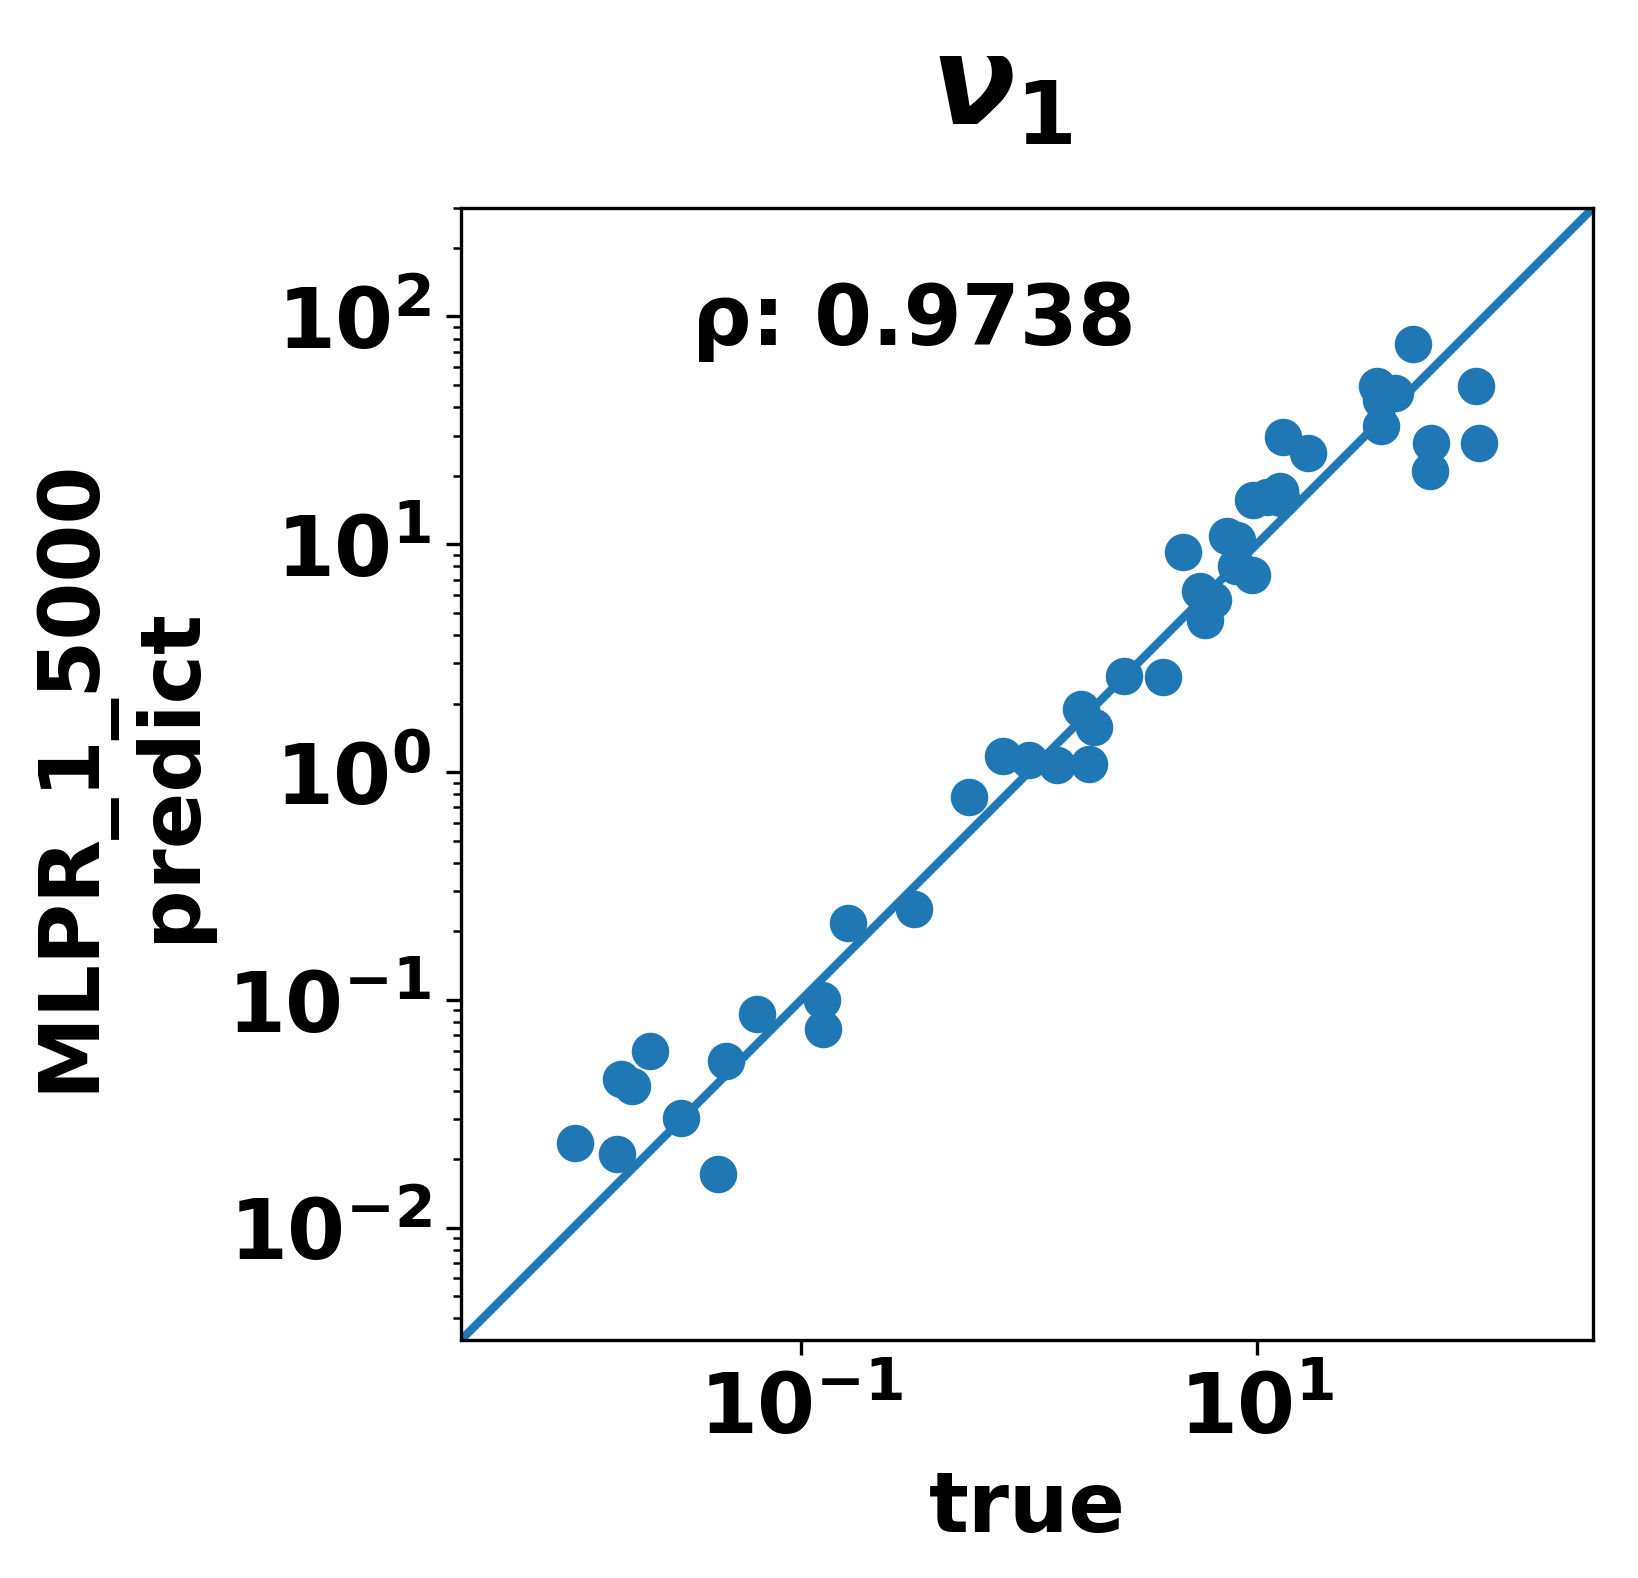

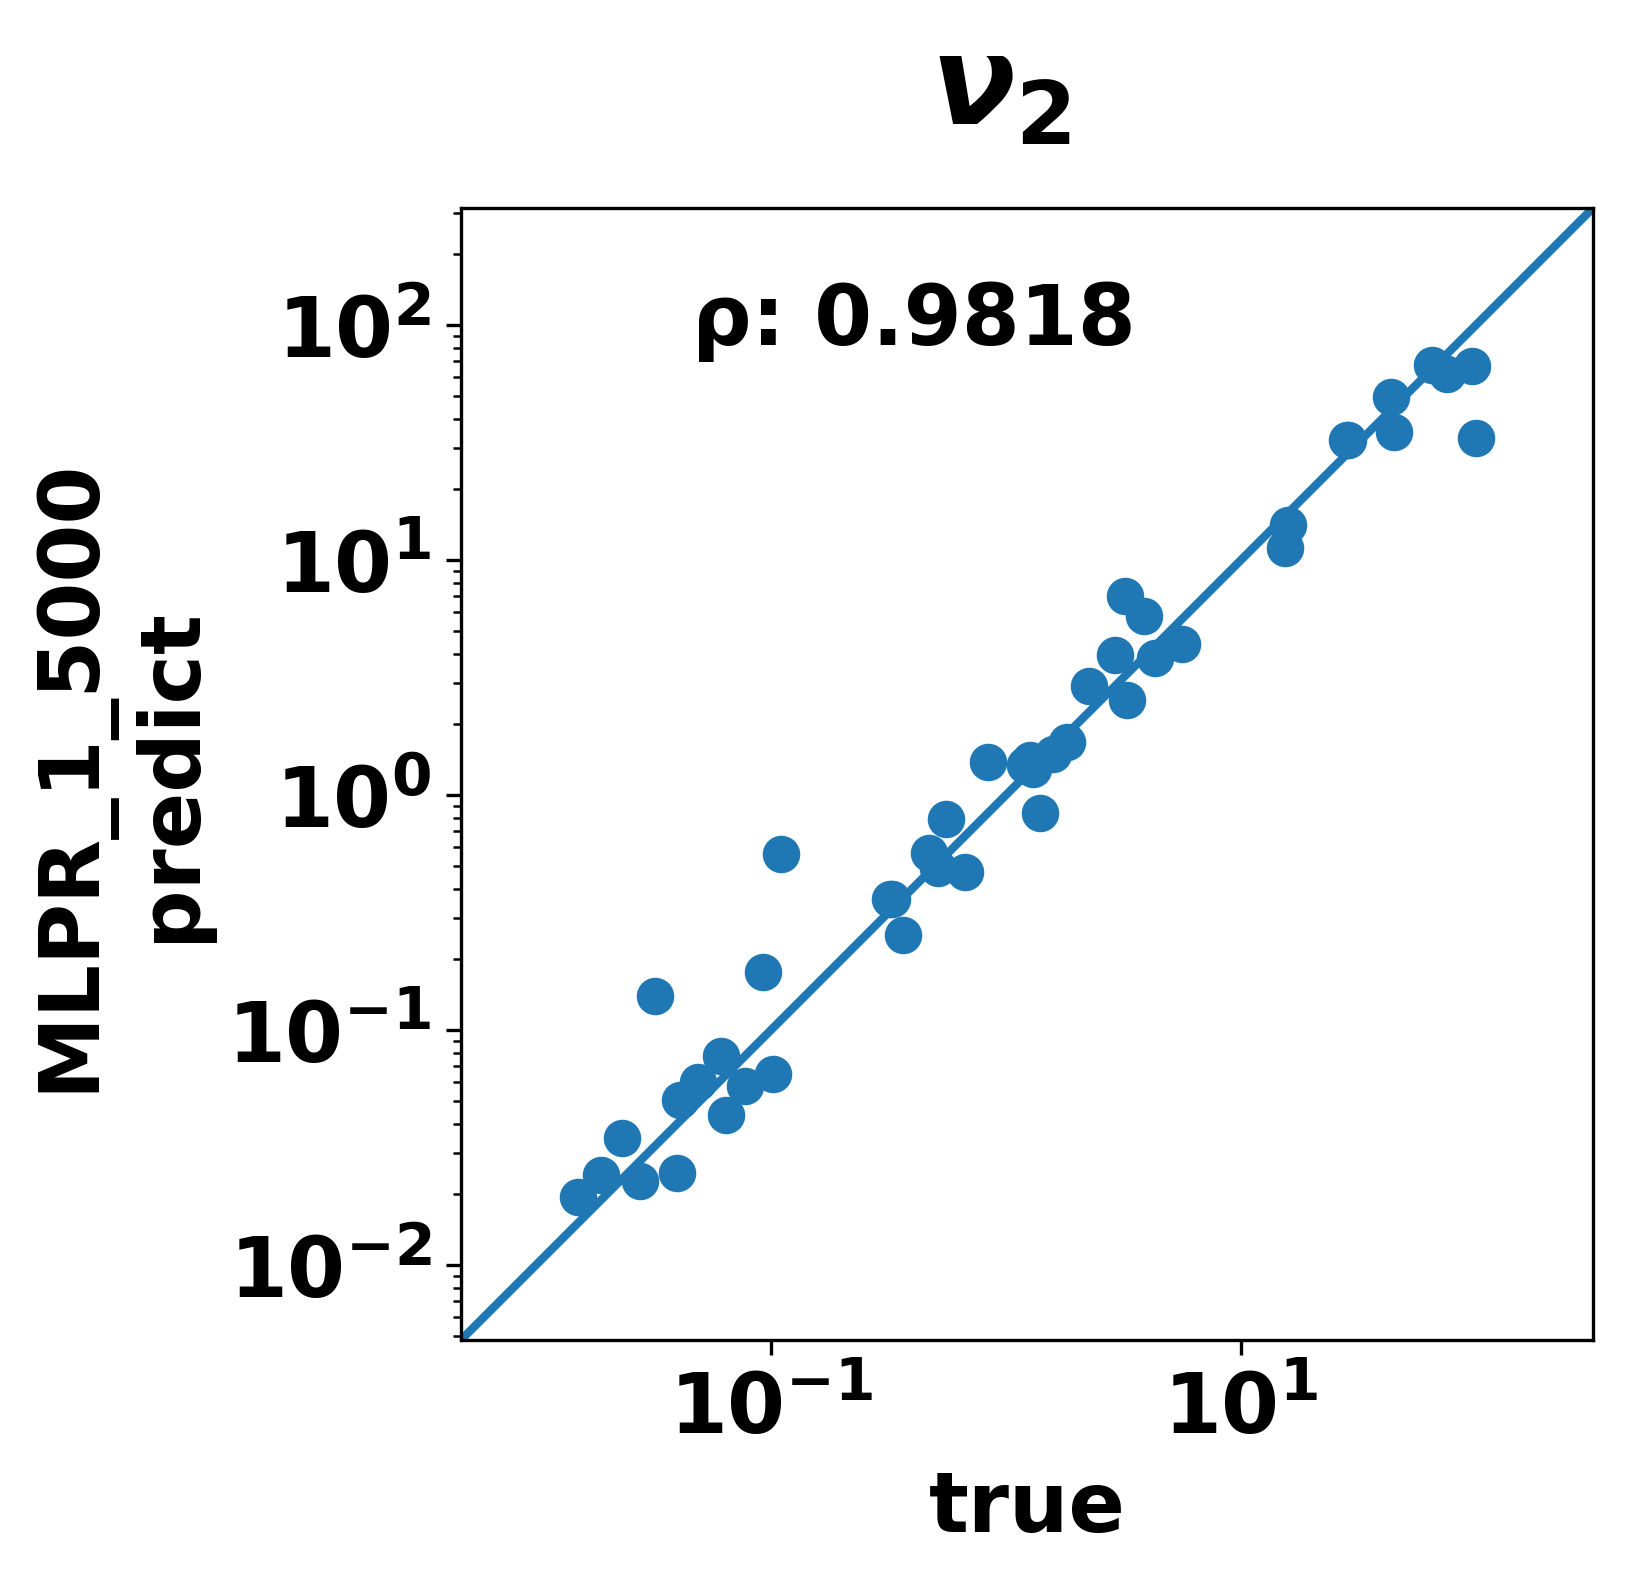

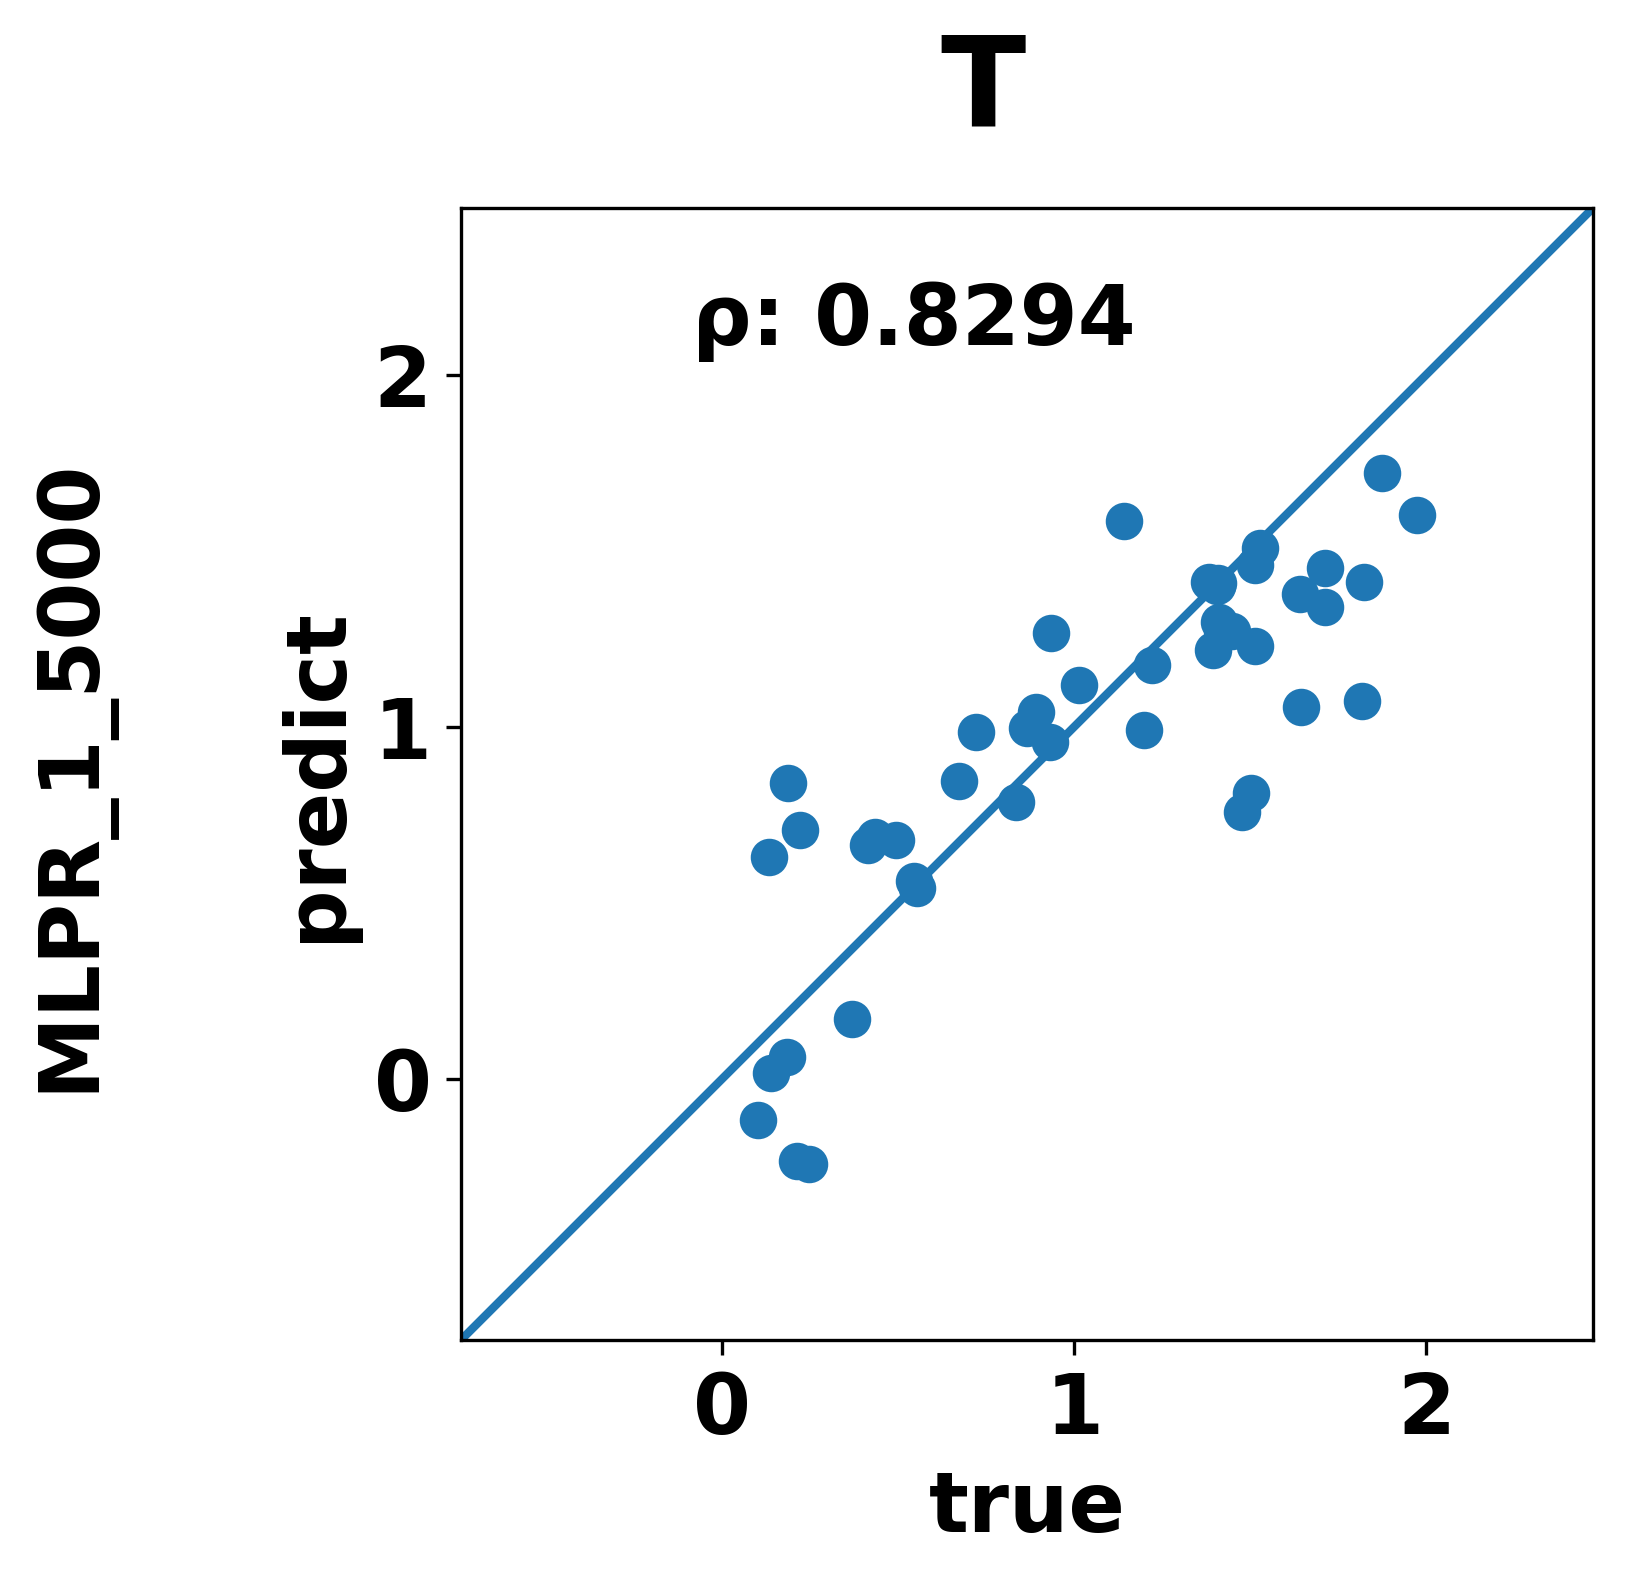

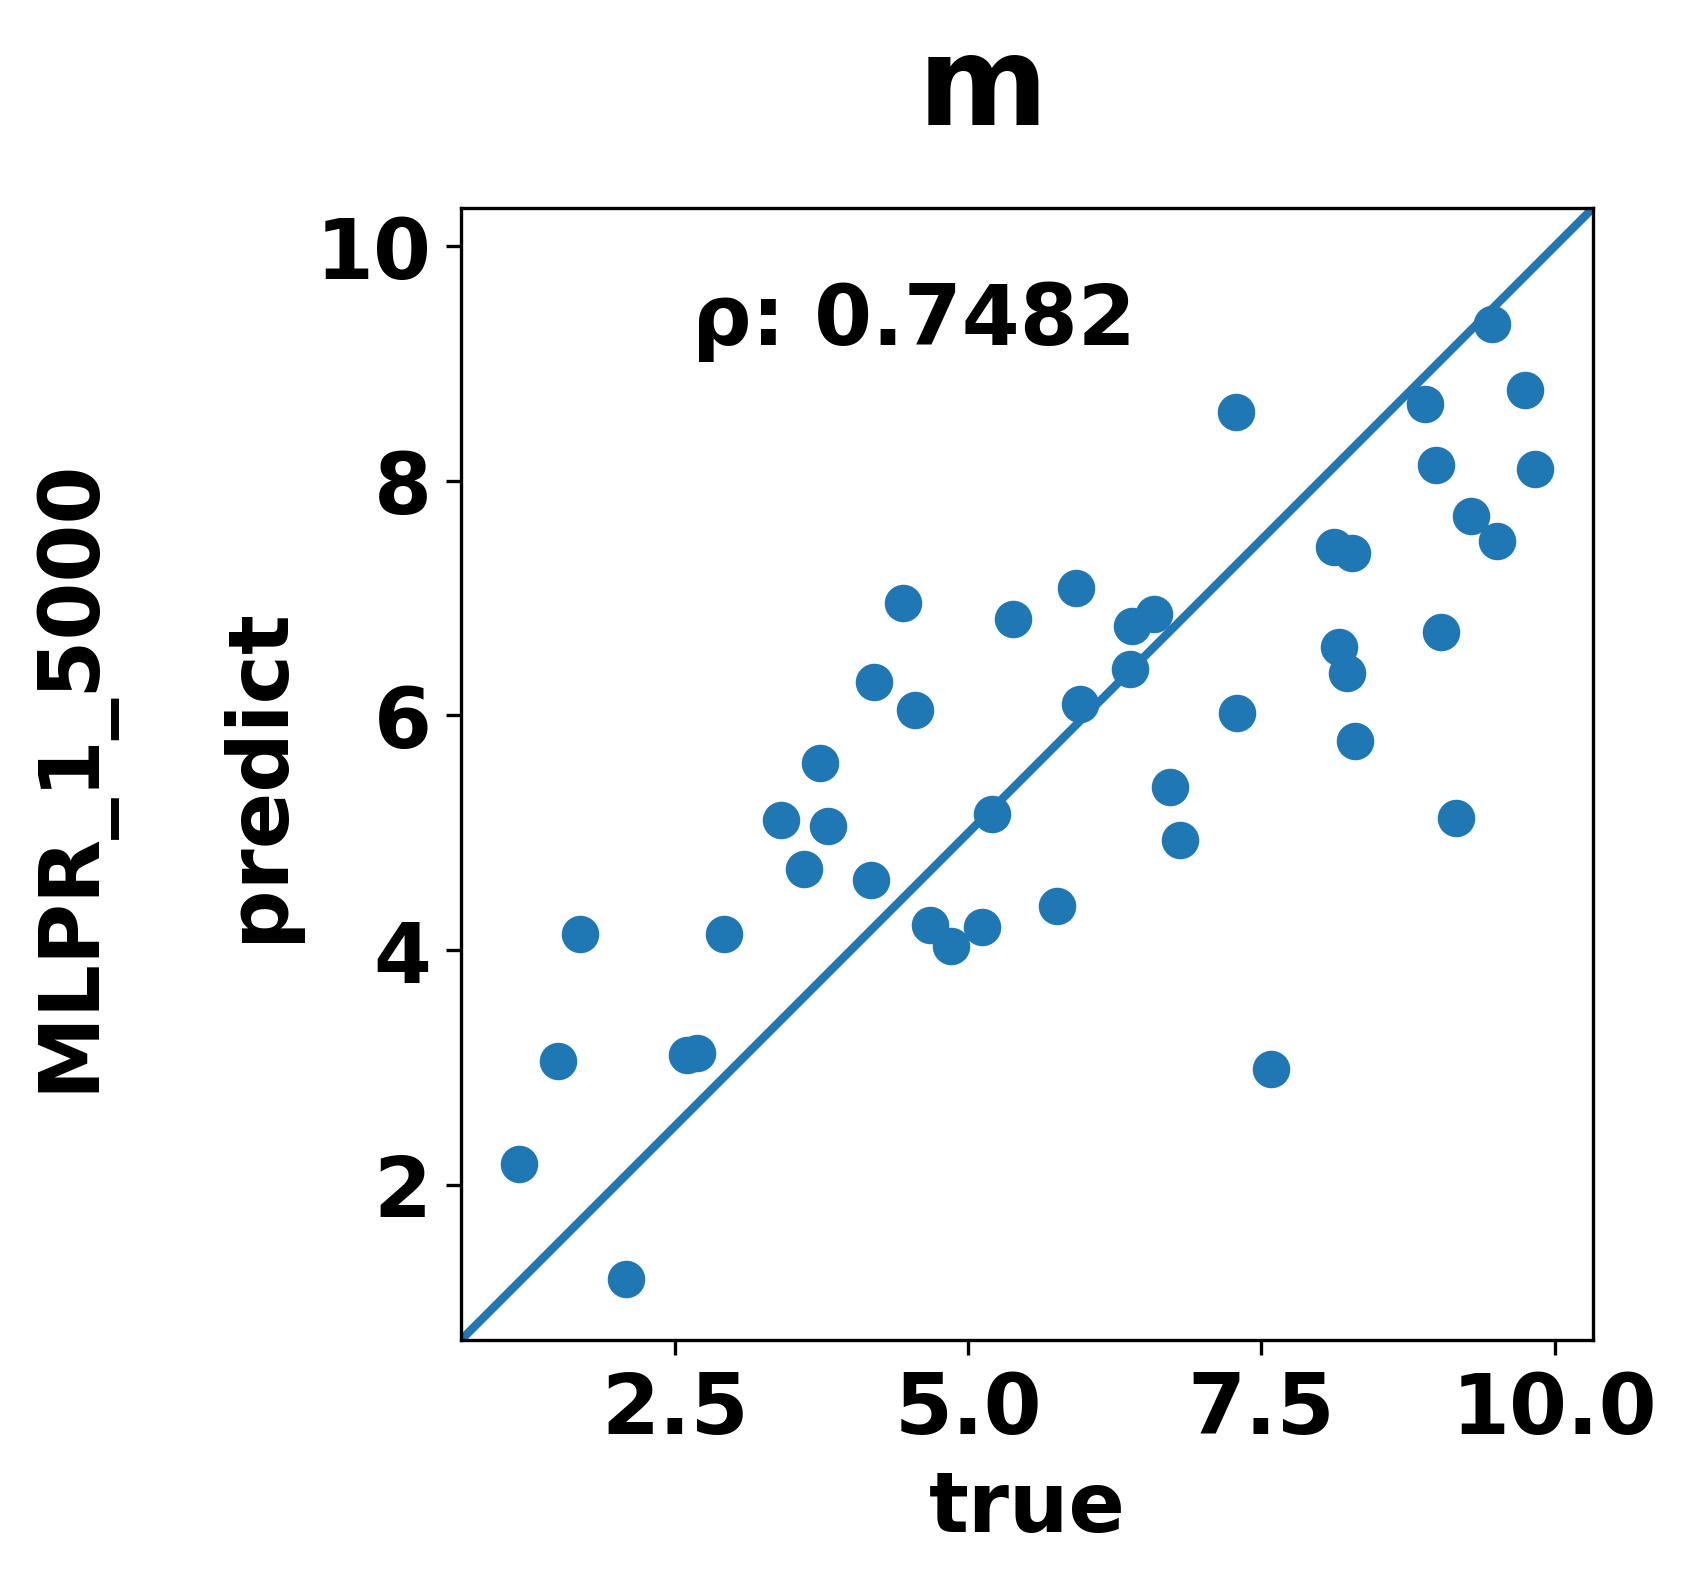

In [19]:
# Plot MLPR prediction, my random theta=1_5000 MLPR
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(5,5))
plot_accuracy_multi([mlpr_random_1[0]], test_dict, logs, params, size, y_label="MLPR_1_5000")
# plot_accuracy_multi([list_mlpr_random[0]], test_dict, logs, params, size)
# # save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'data/dadi_opt/pres/{params[i]}_mlpr.png')

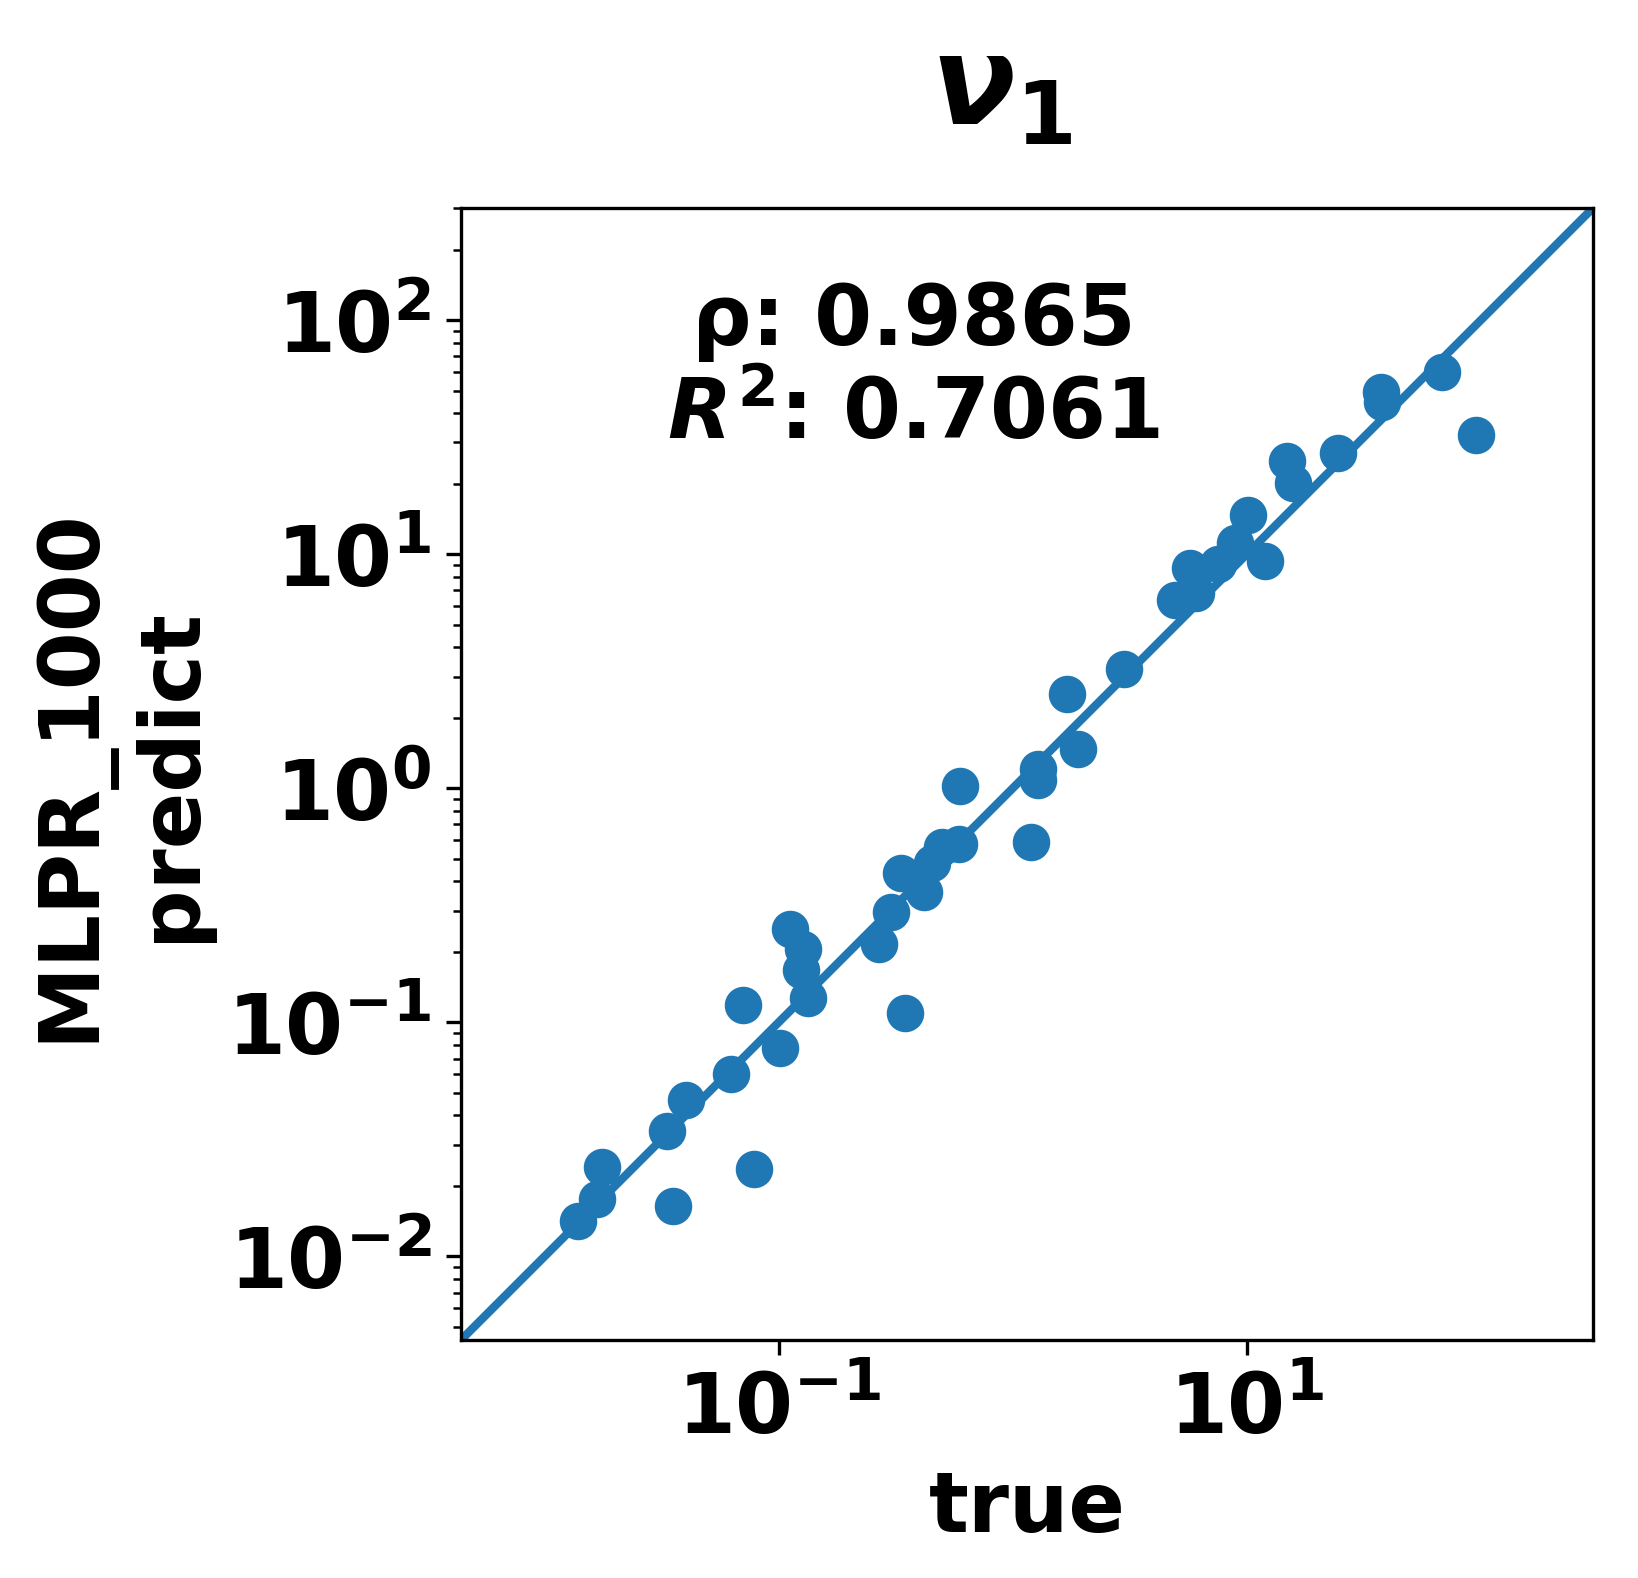

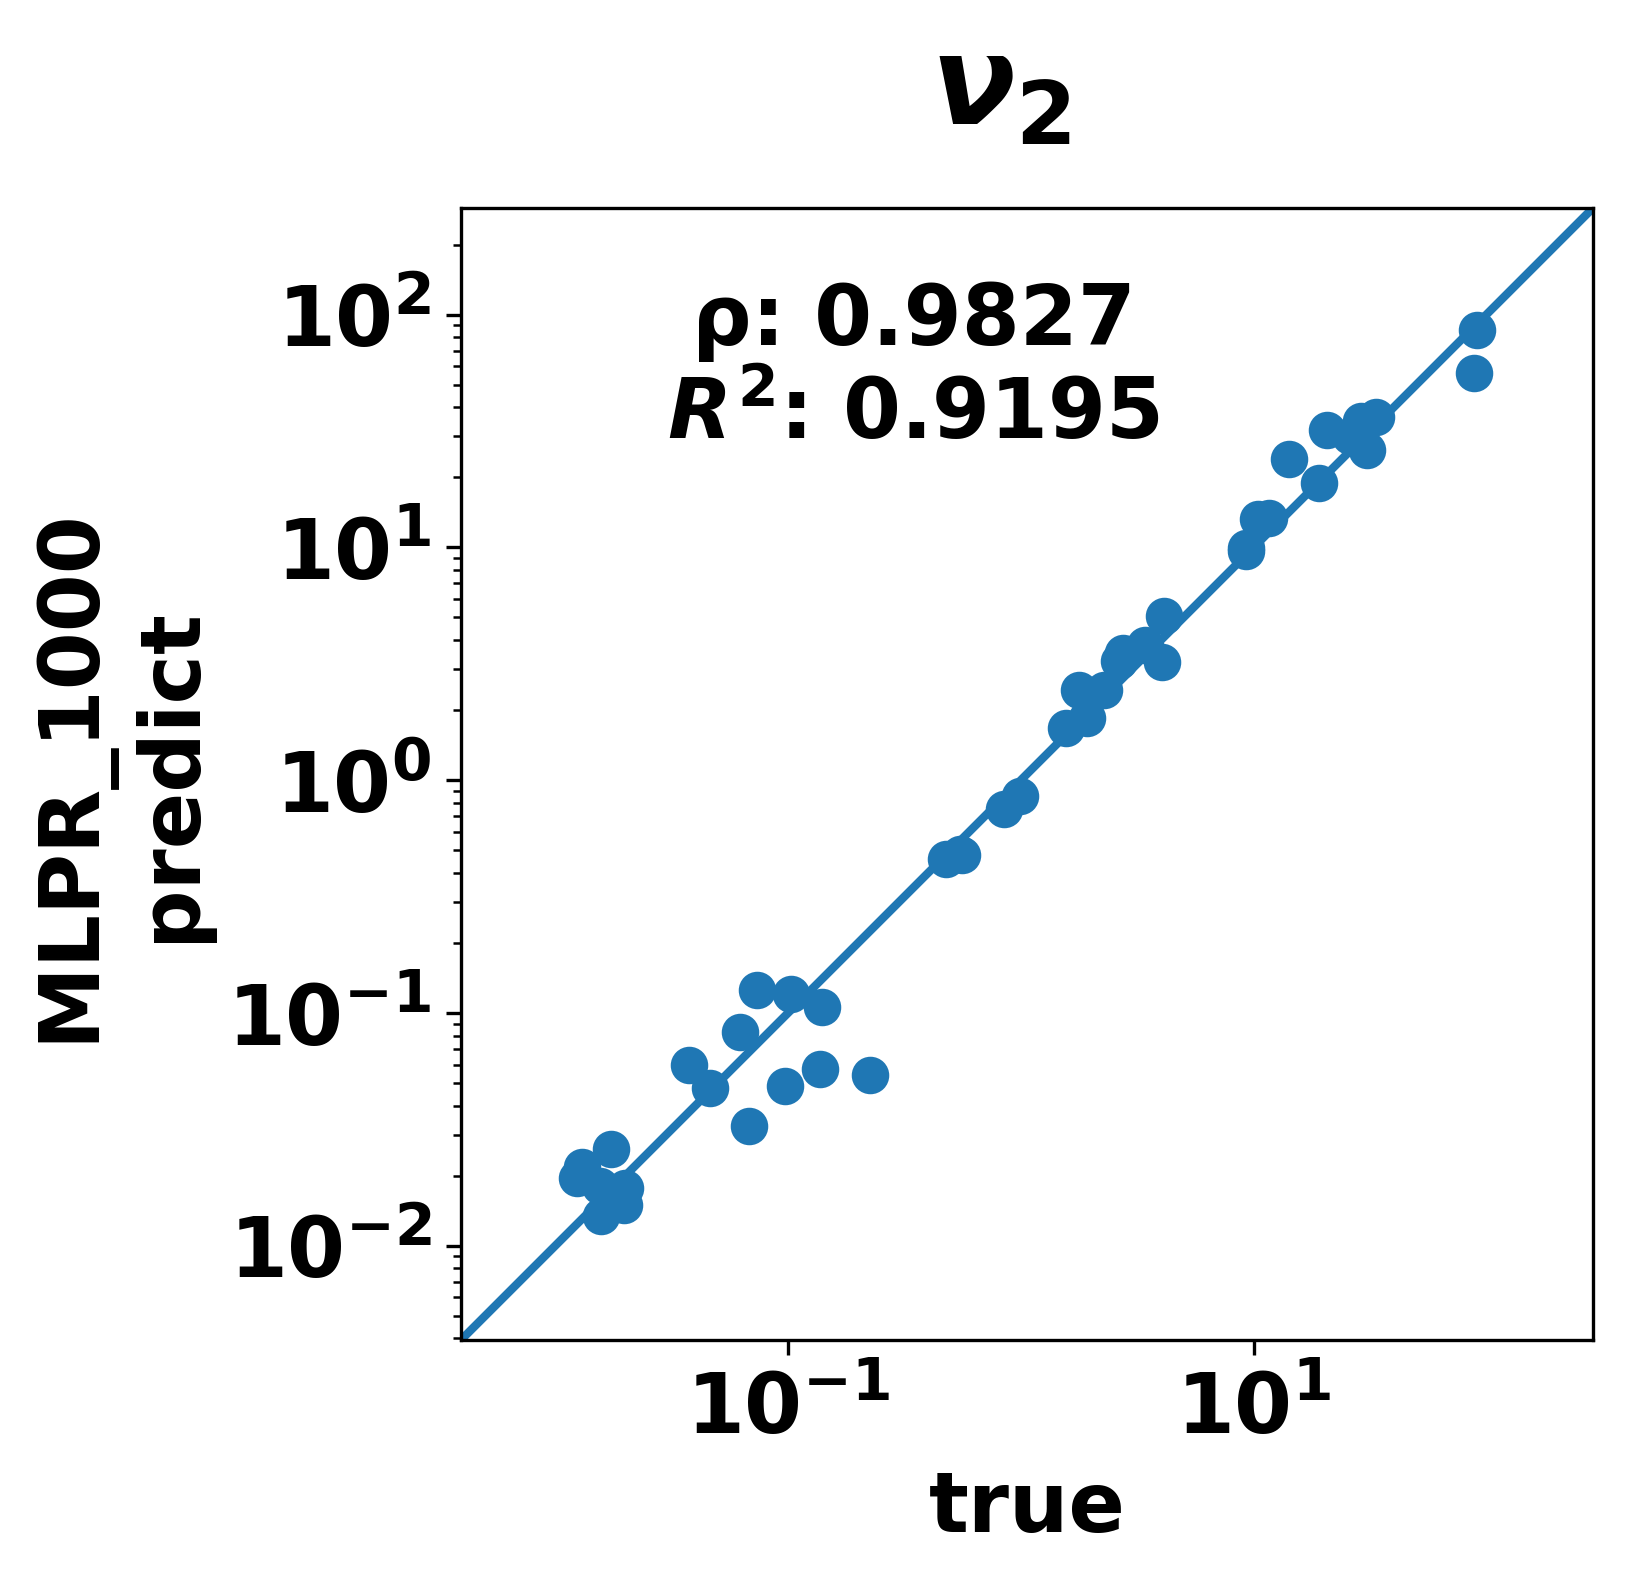

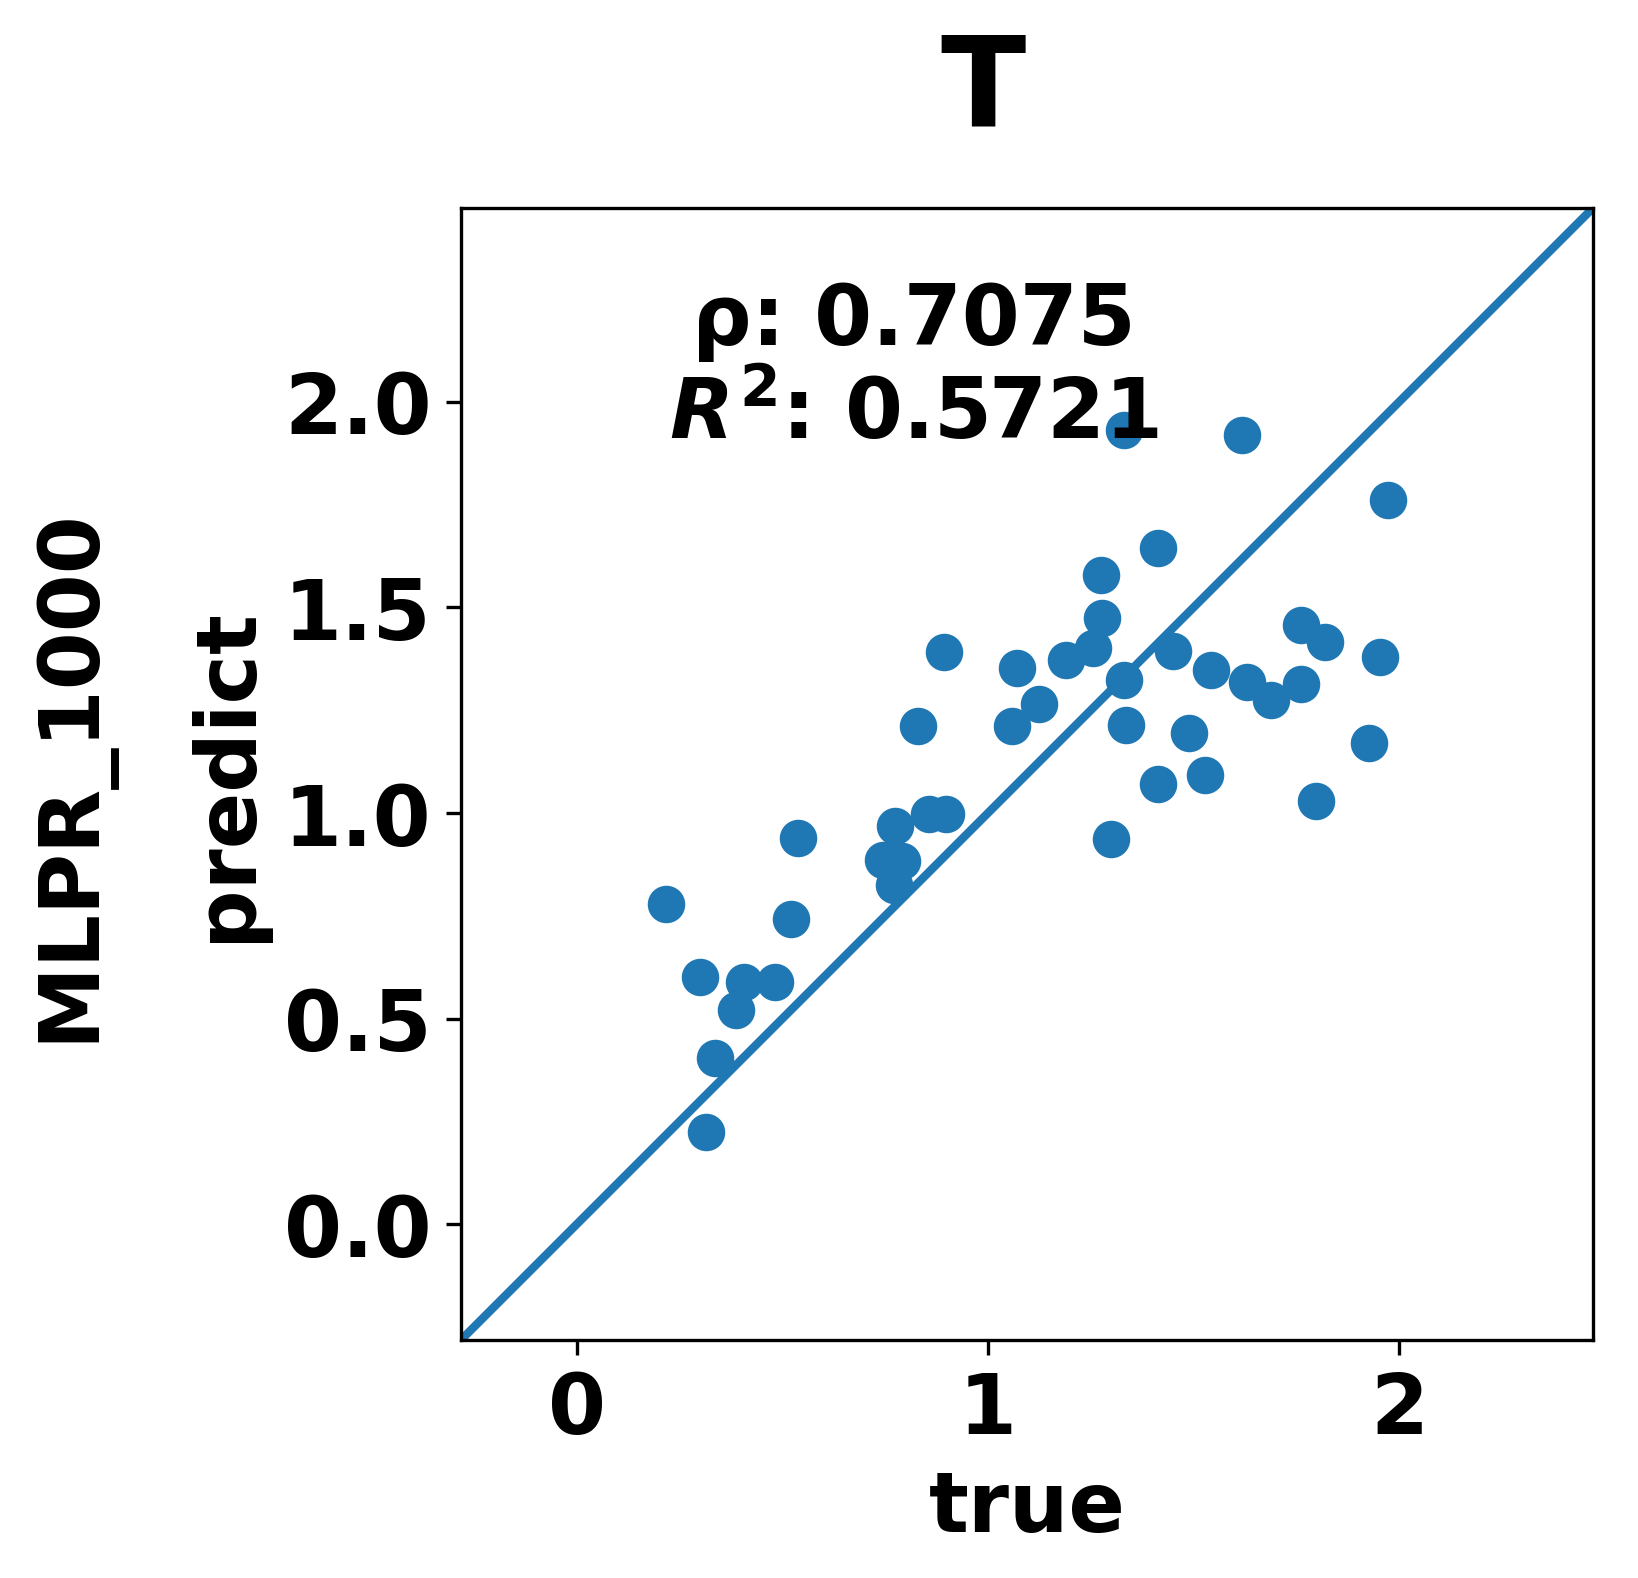

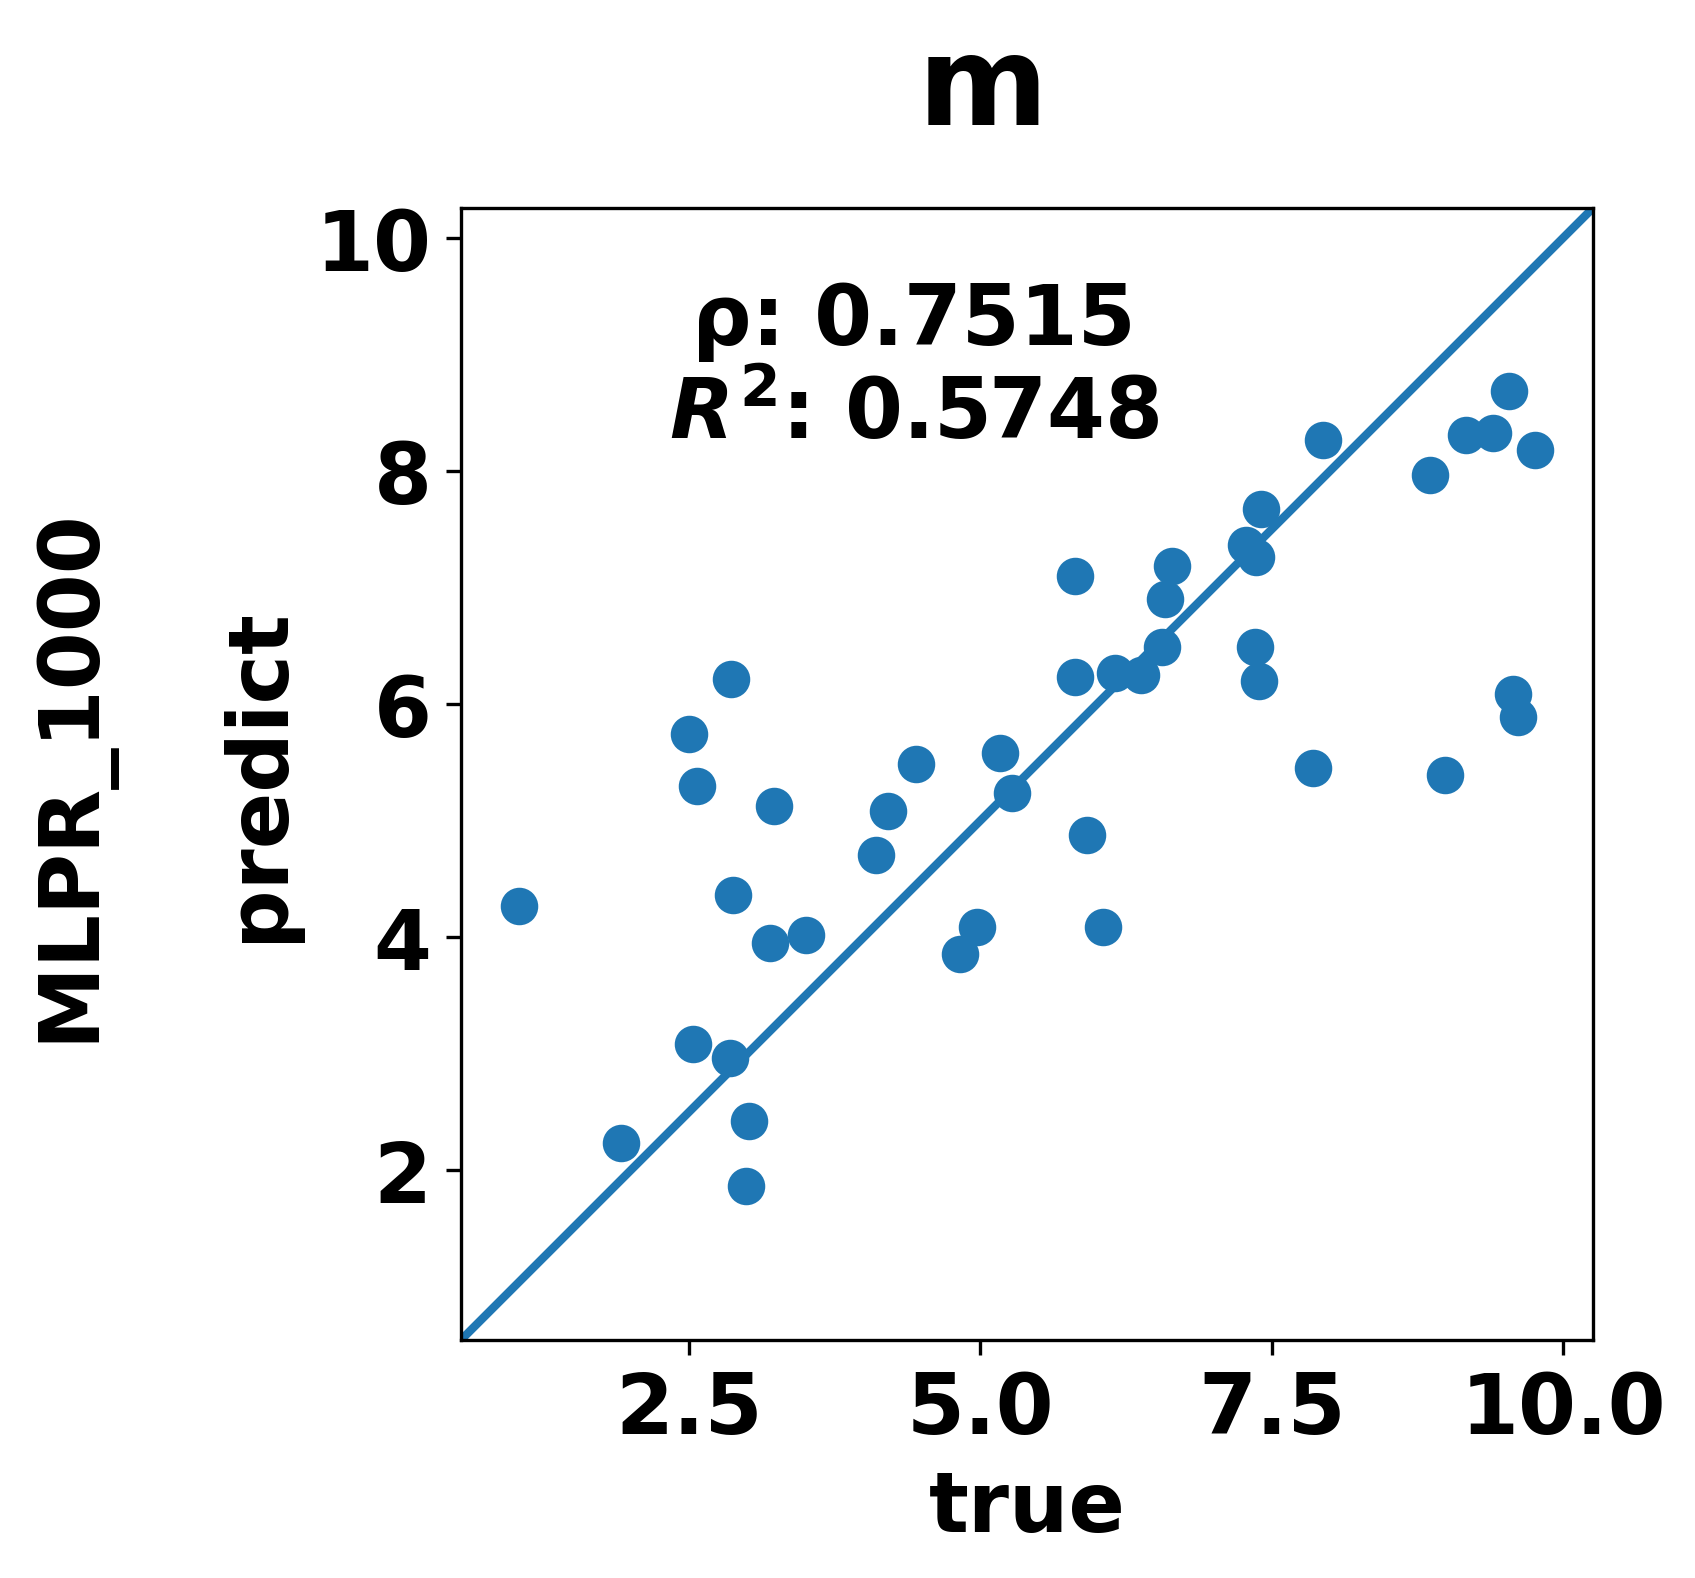

In [20]:
# Plot MLPR prediction, Connie's theta=1000 MLPR
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(5,5))
plot_accuracy_multi([list_mlpr_connie_1000], test_dict, logs, params, size, title=" ", y_label="MLPR_1000", r2=True)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

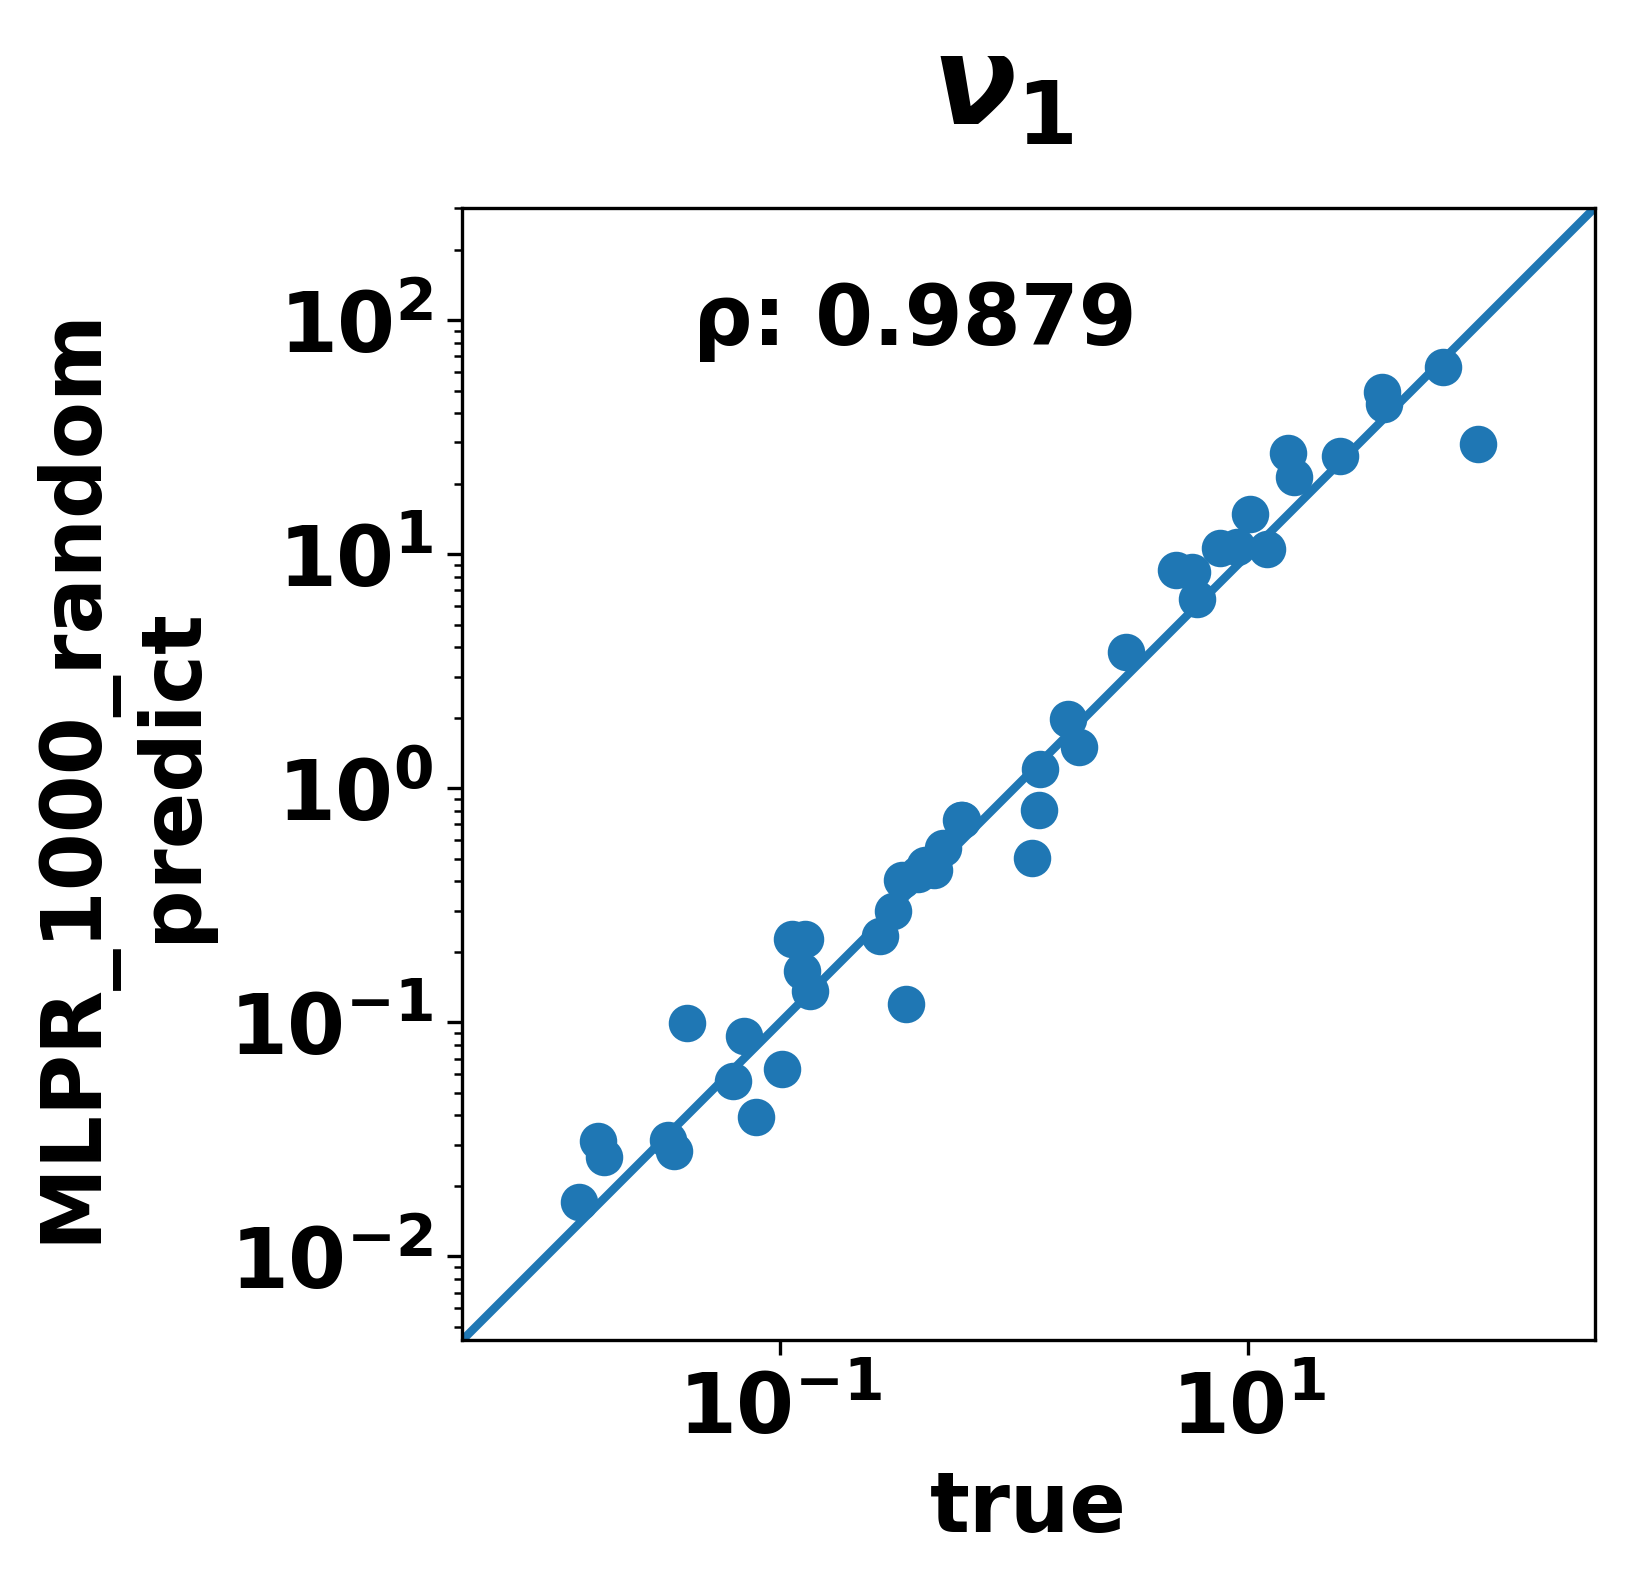

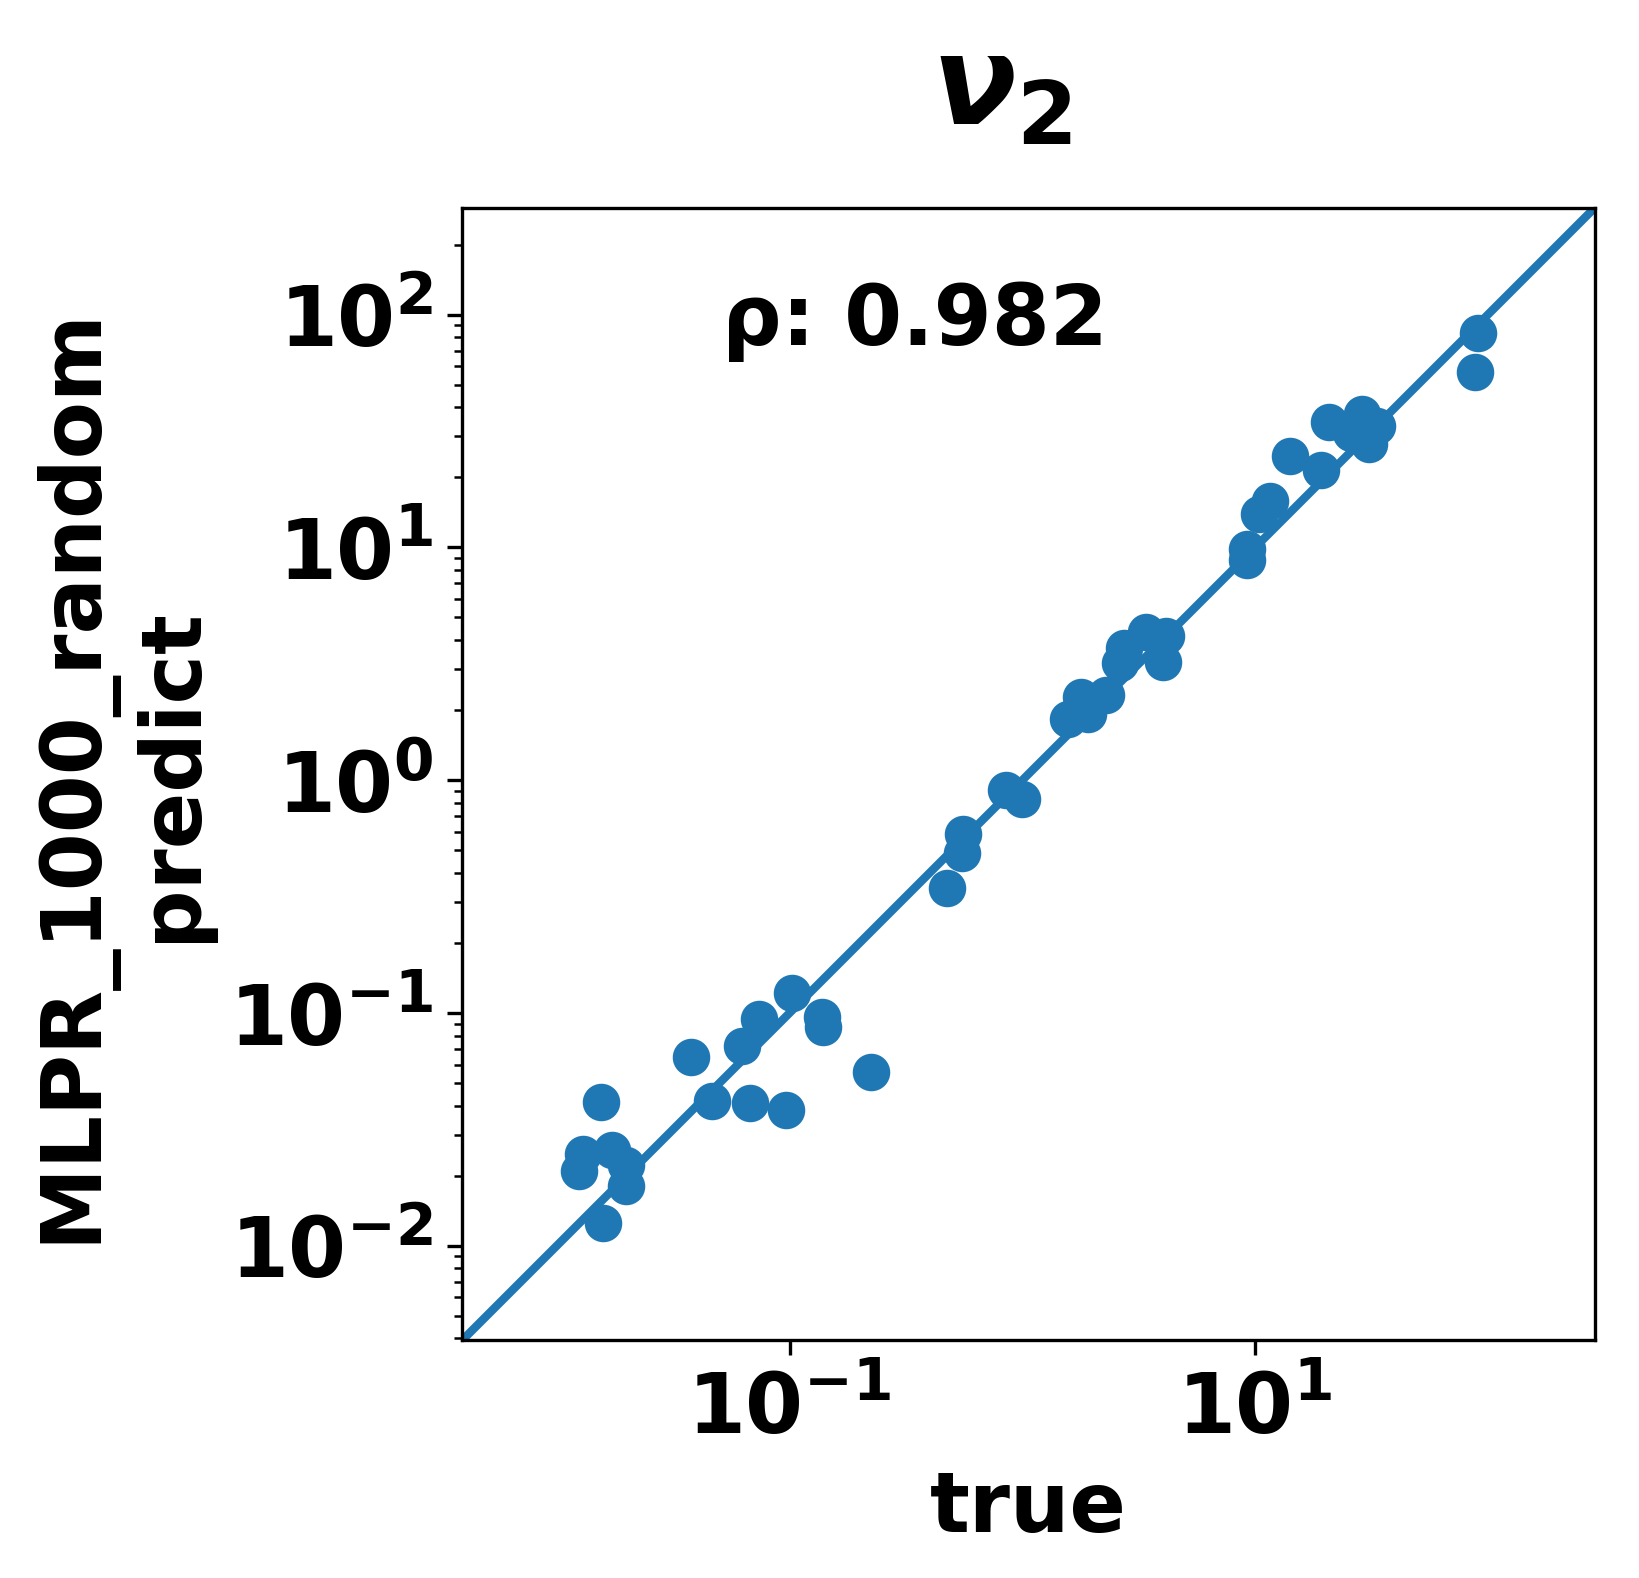

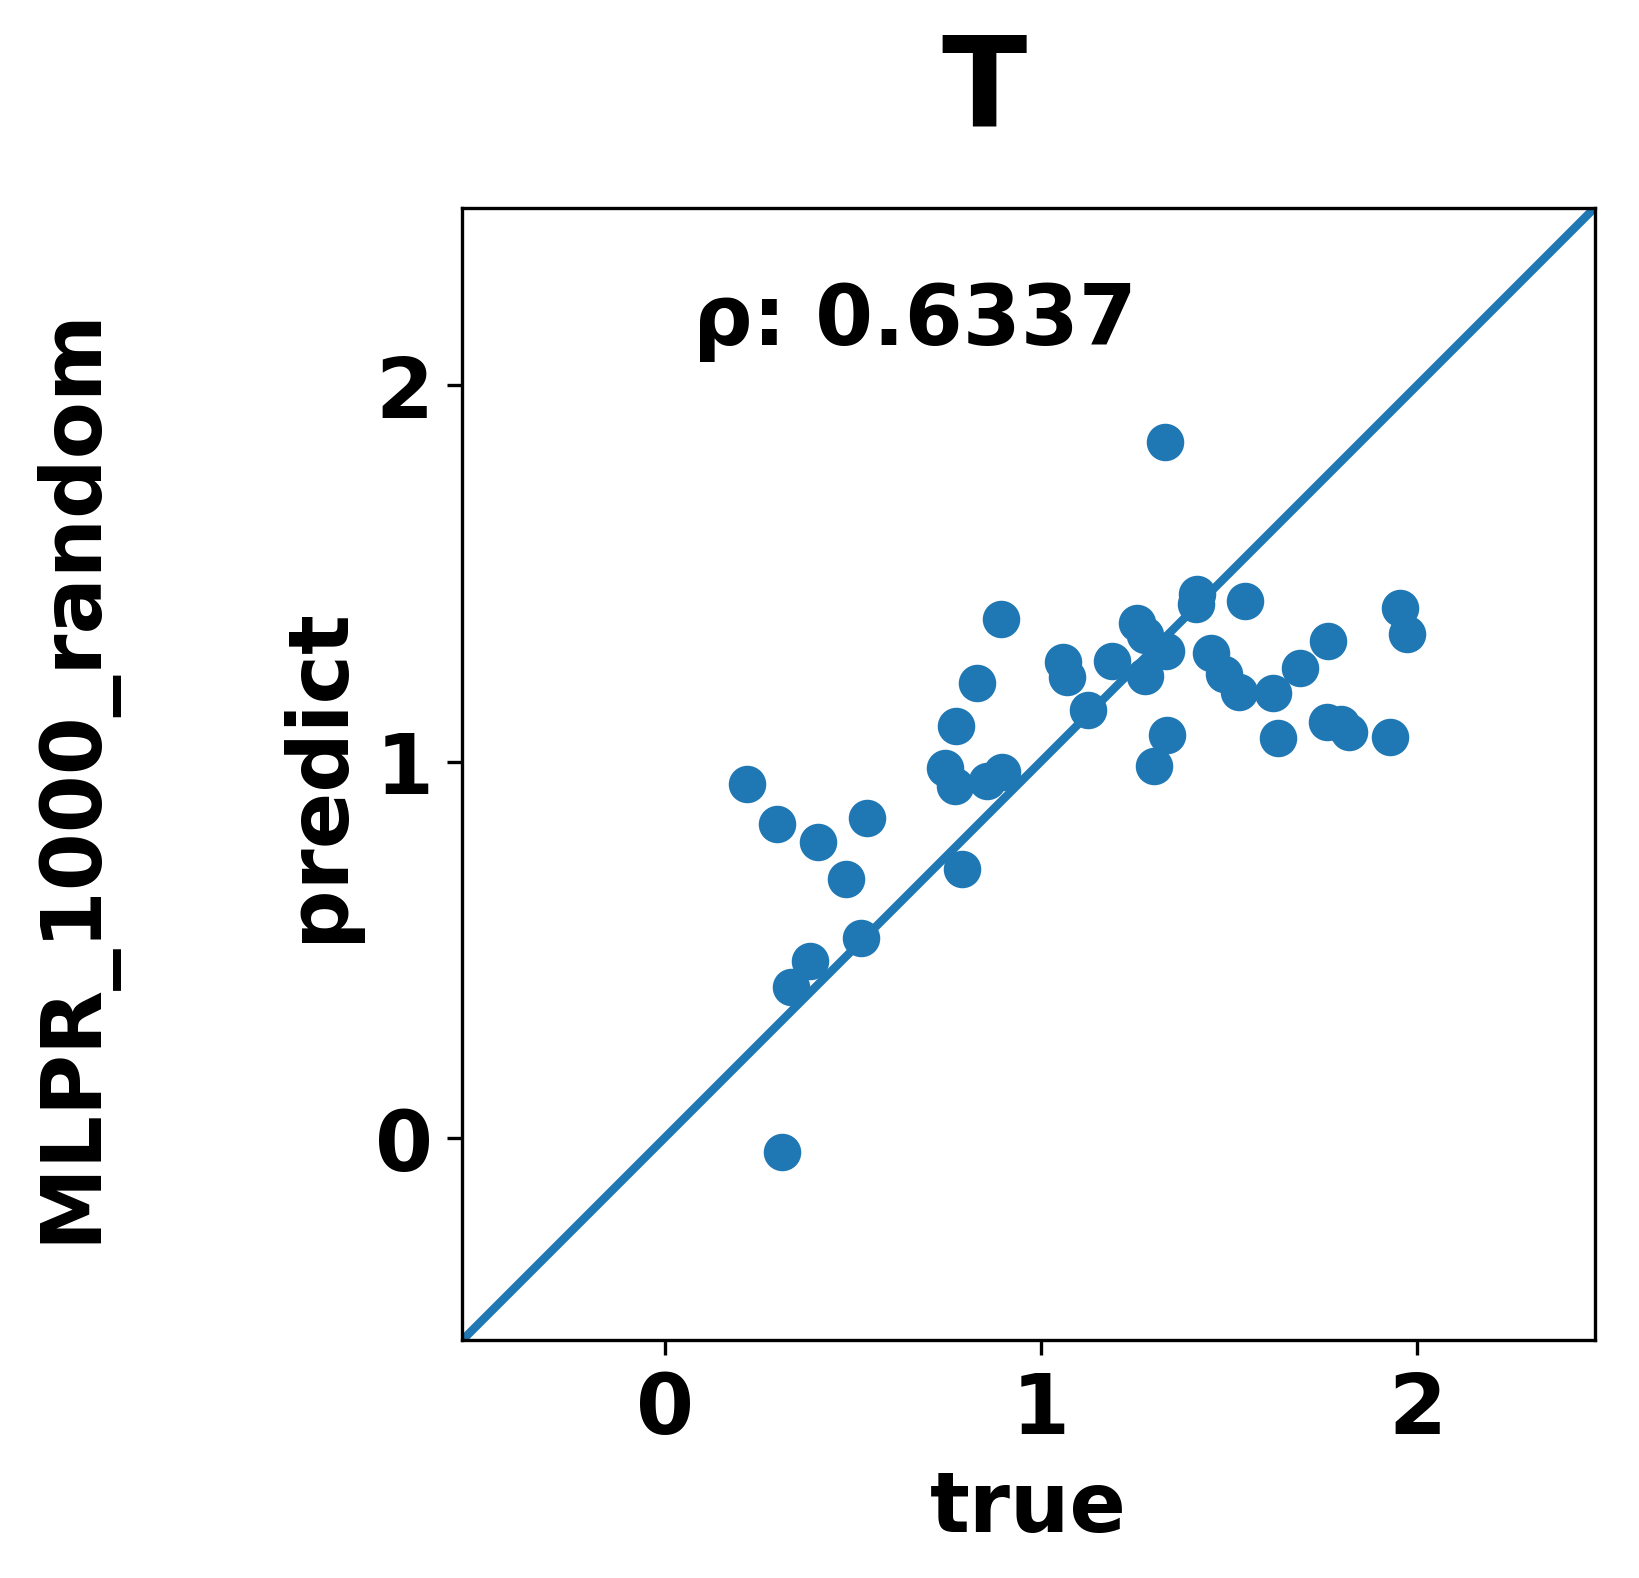

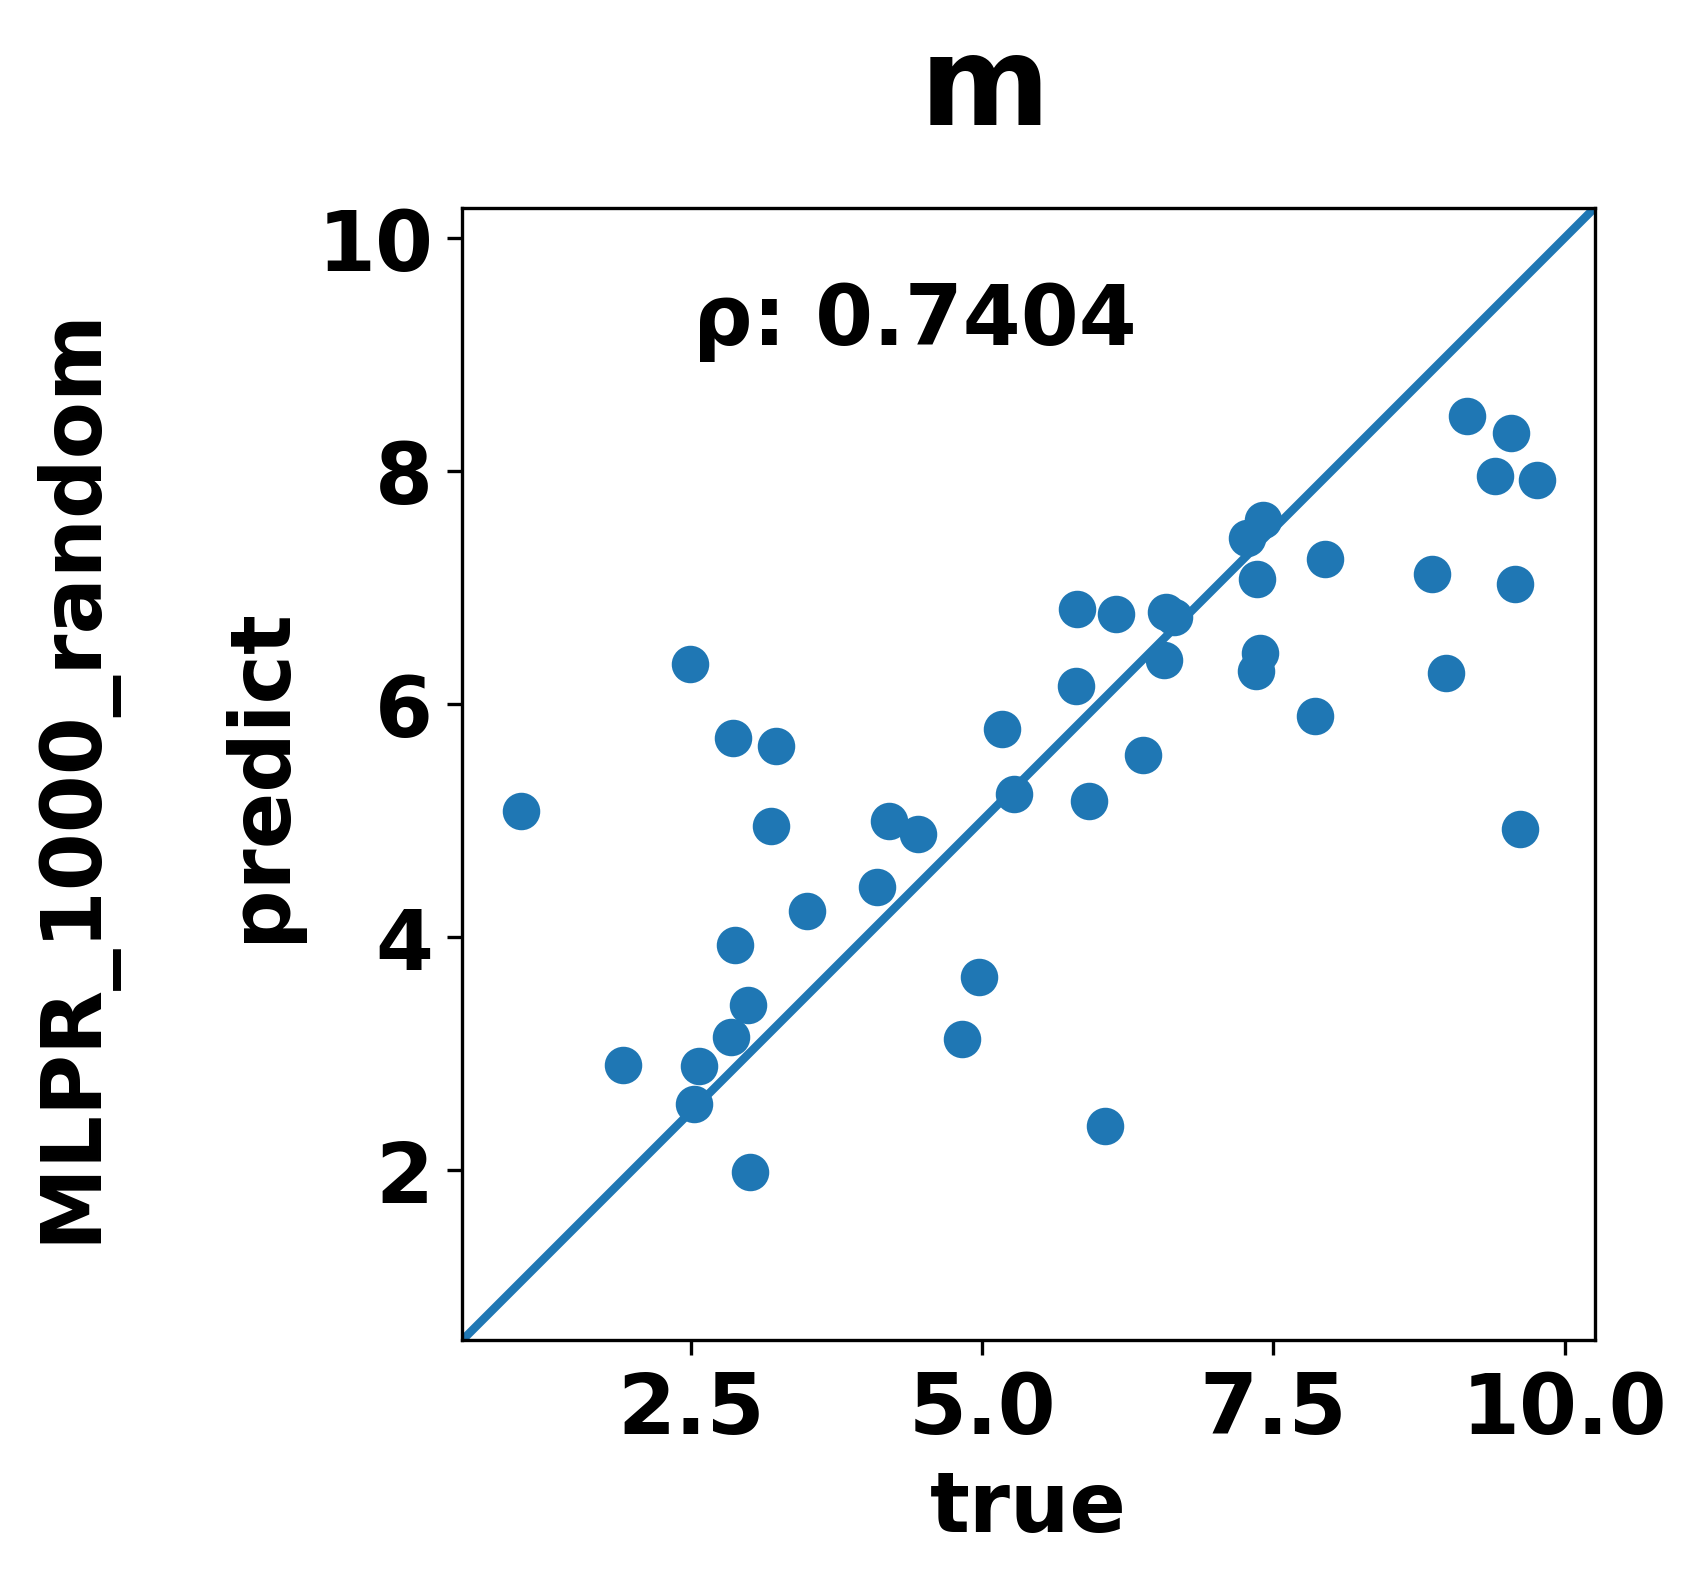

In [26]:
# Plot MLPR prediction, my theta=1 random MLPR
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(5,5))
plot_accuracy_multi([list_mlpr_random[2]], test_dict, logs, params, size, title=" ", y_label="MLPR_1000_random", r2=False)

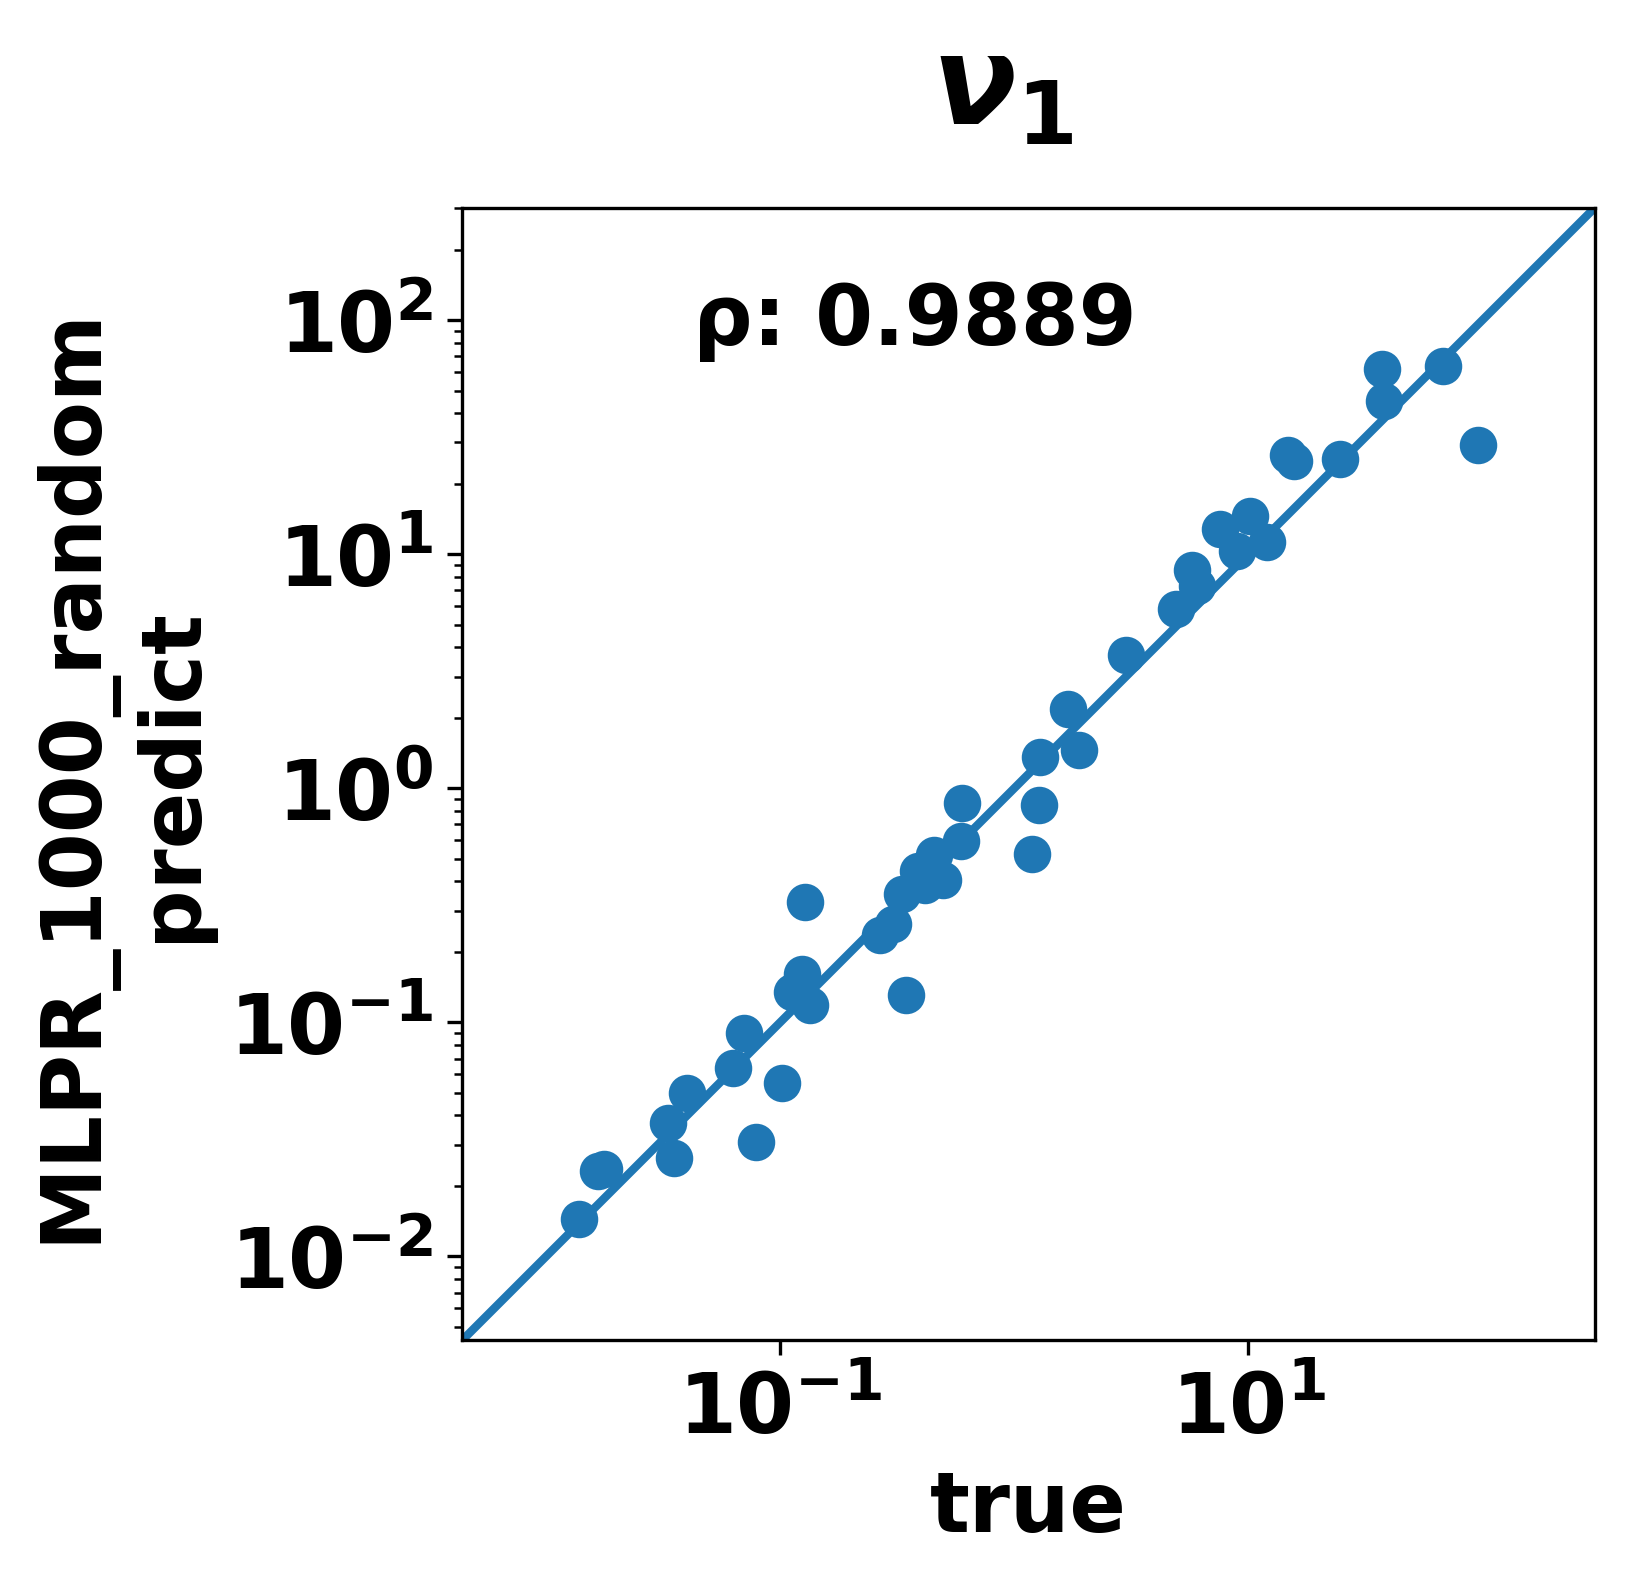

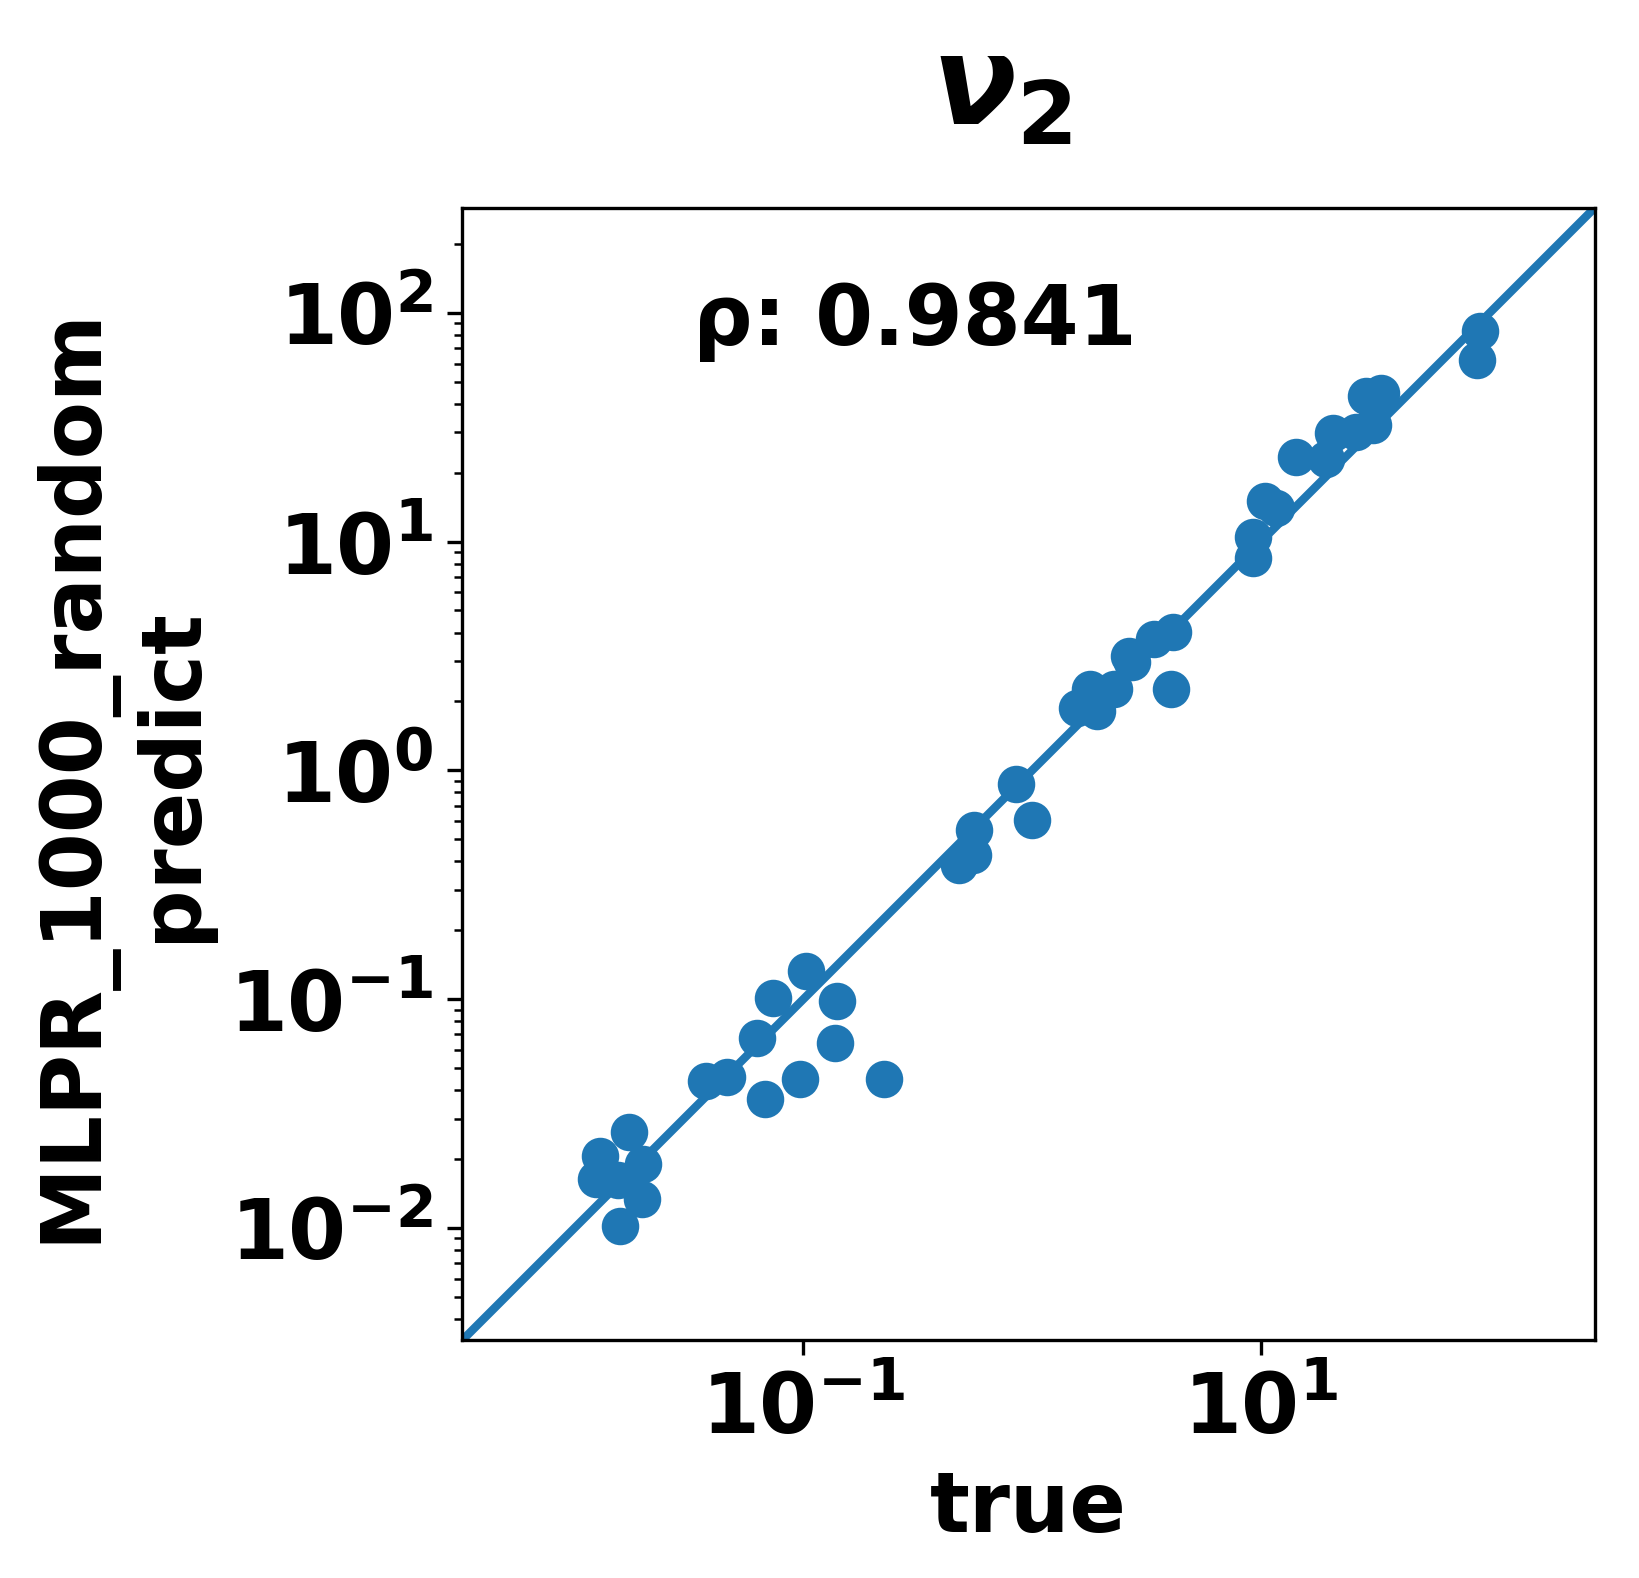

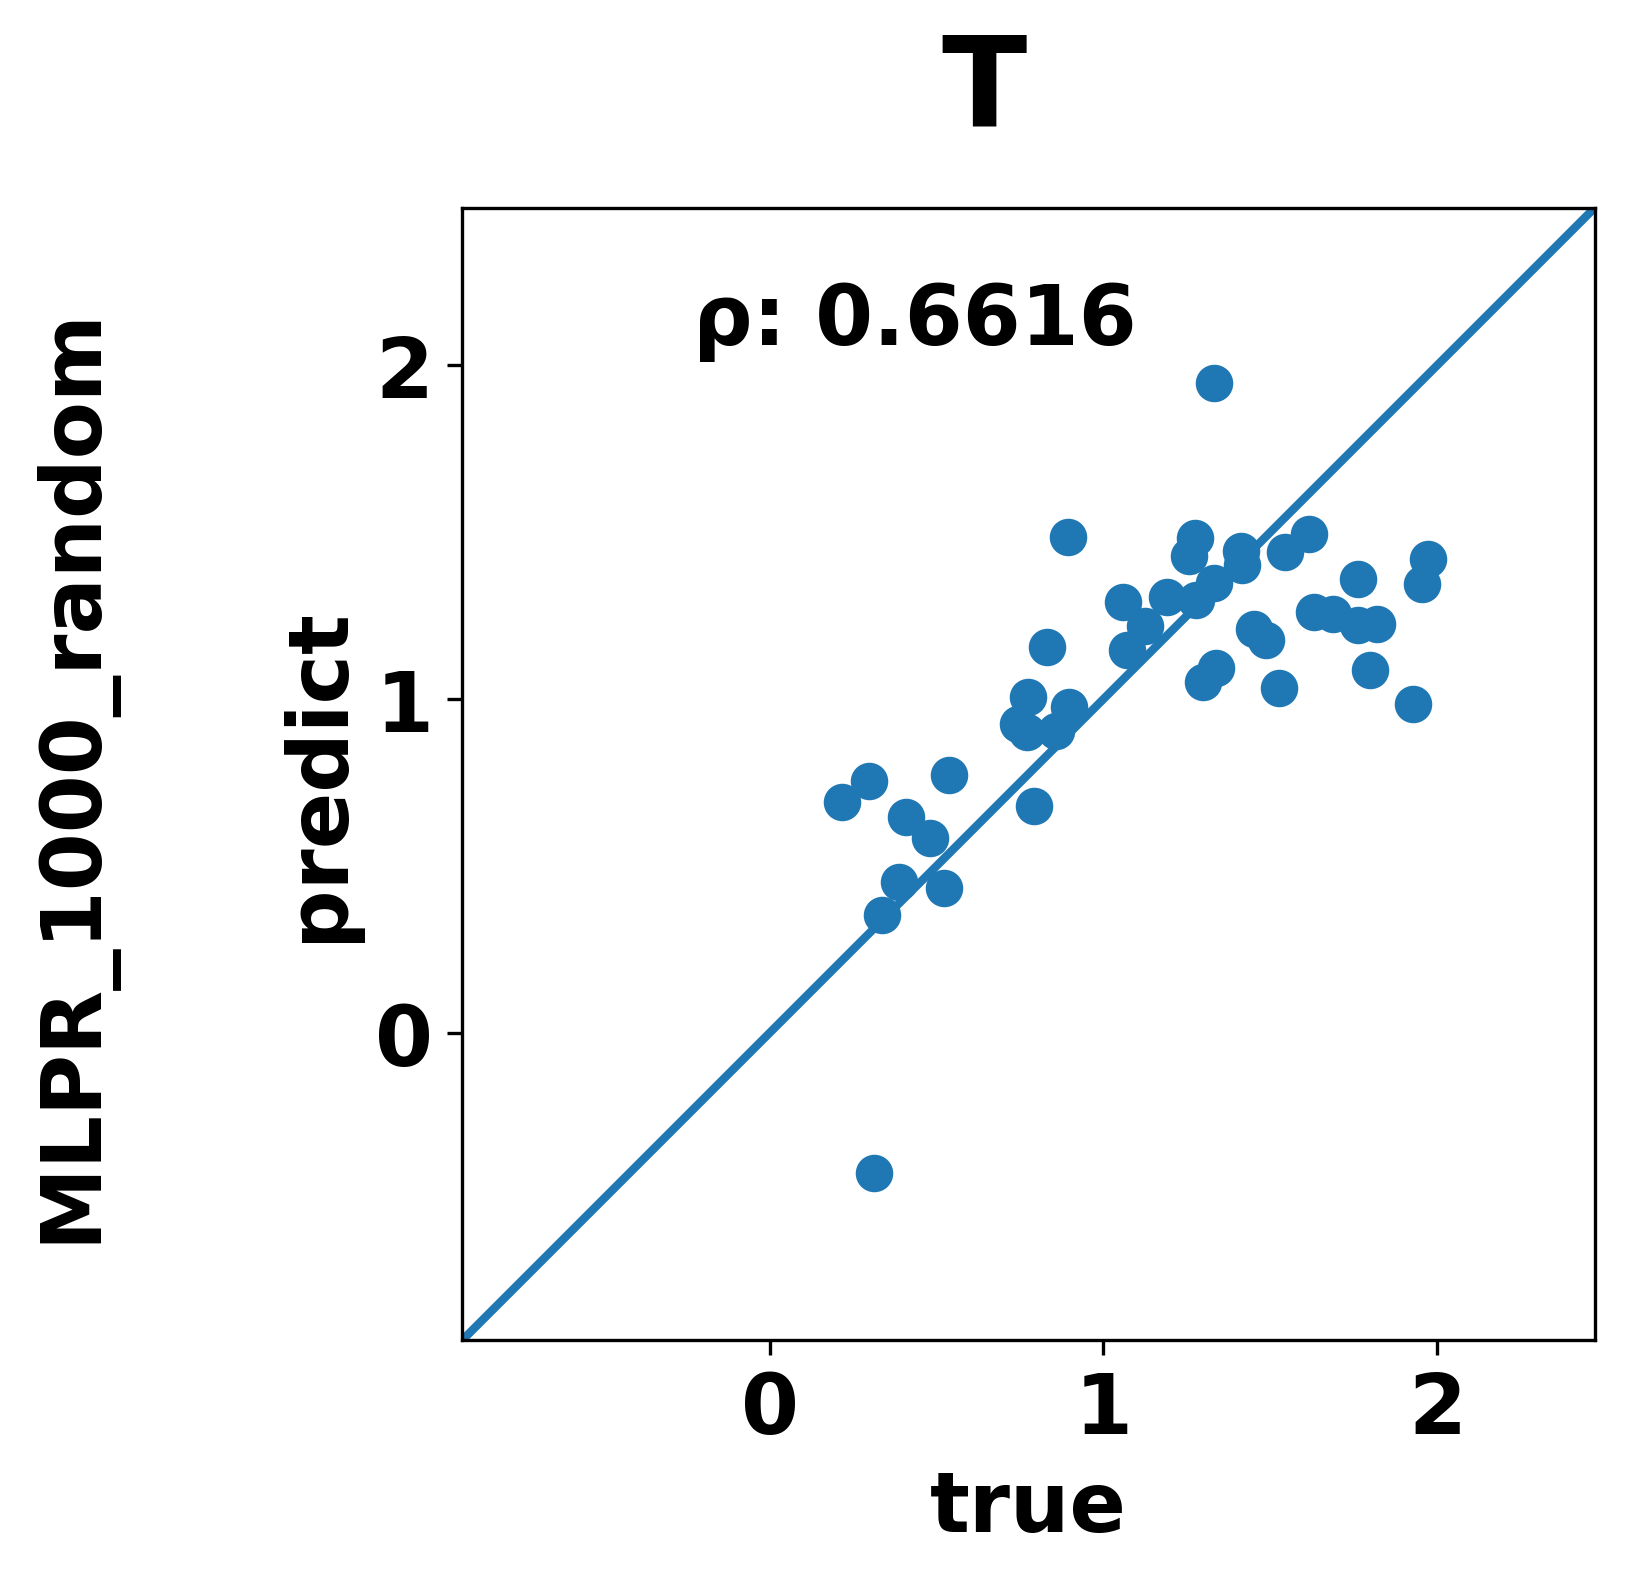

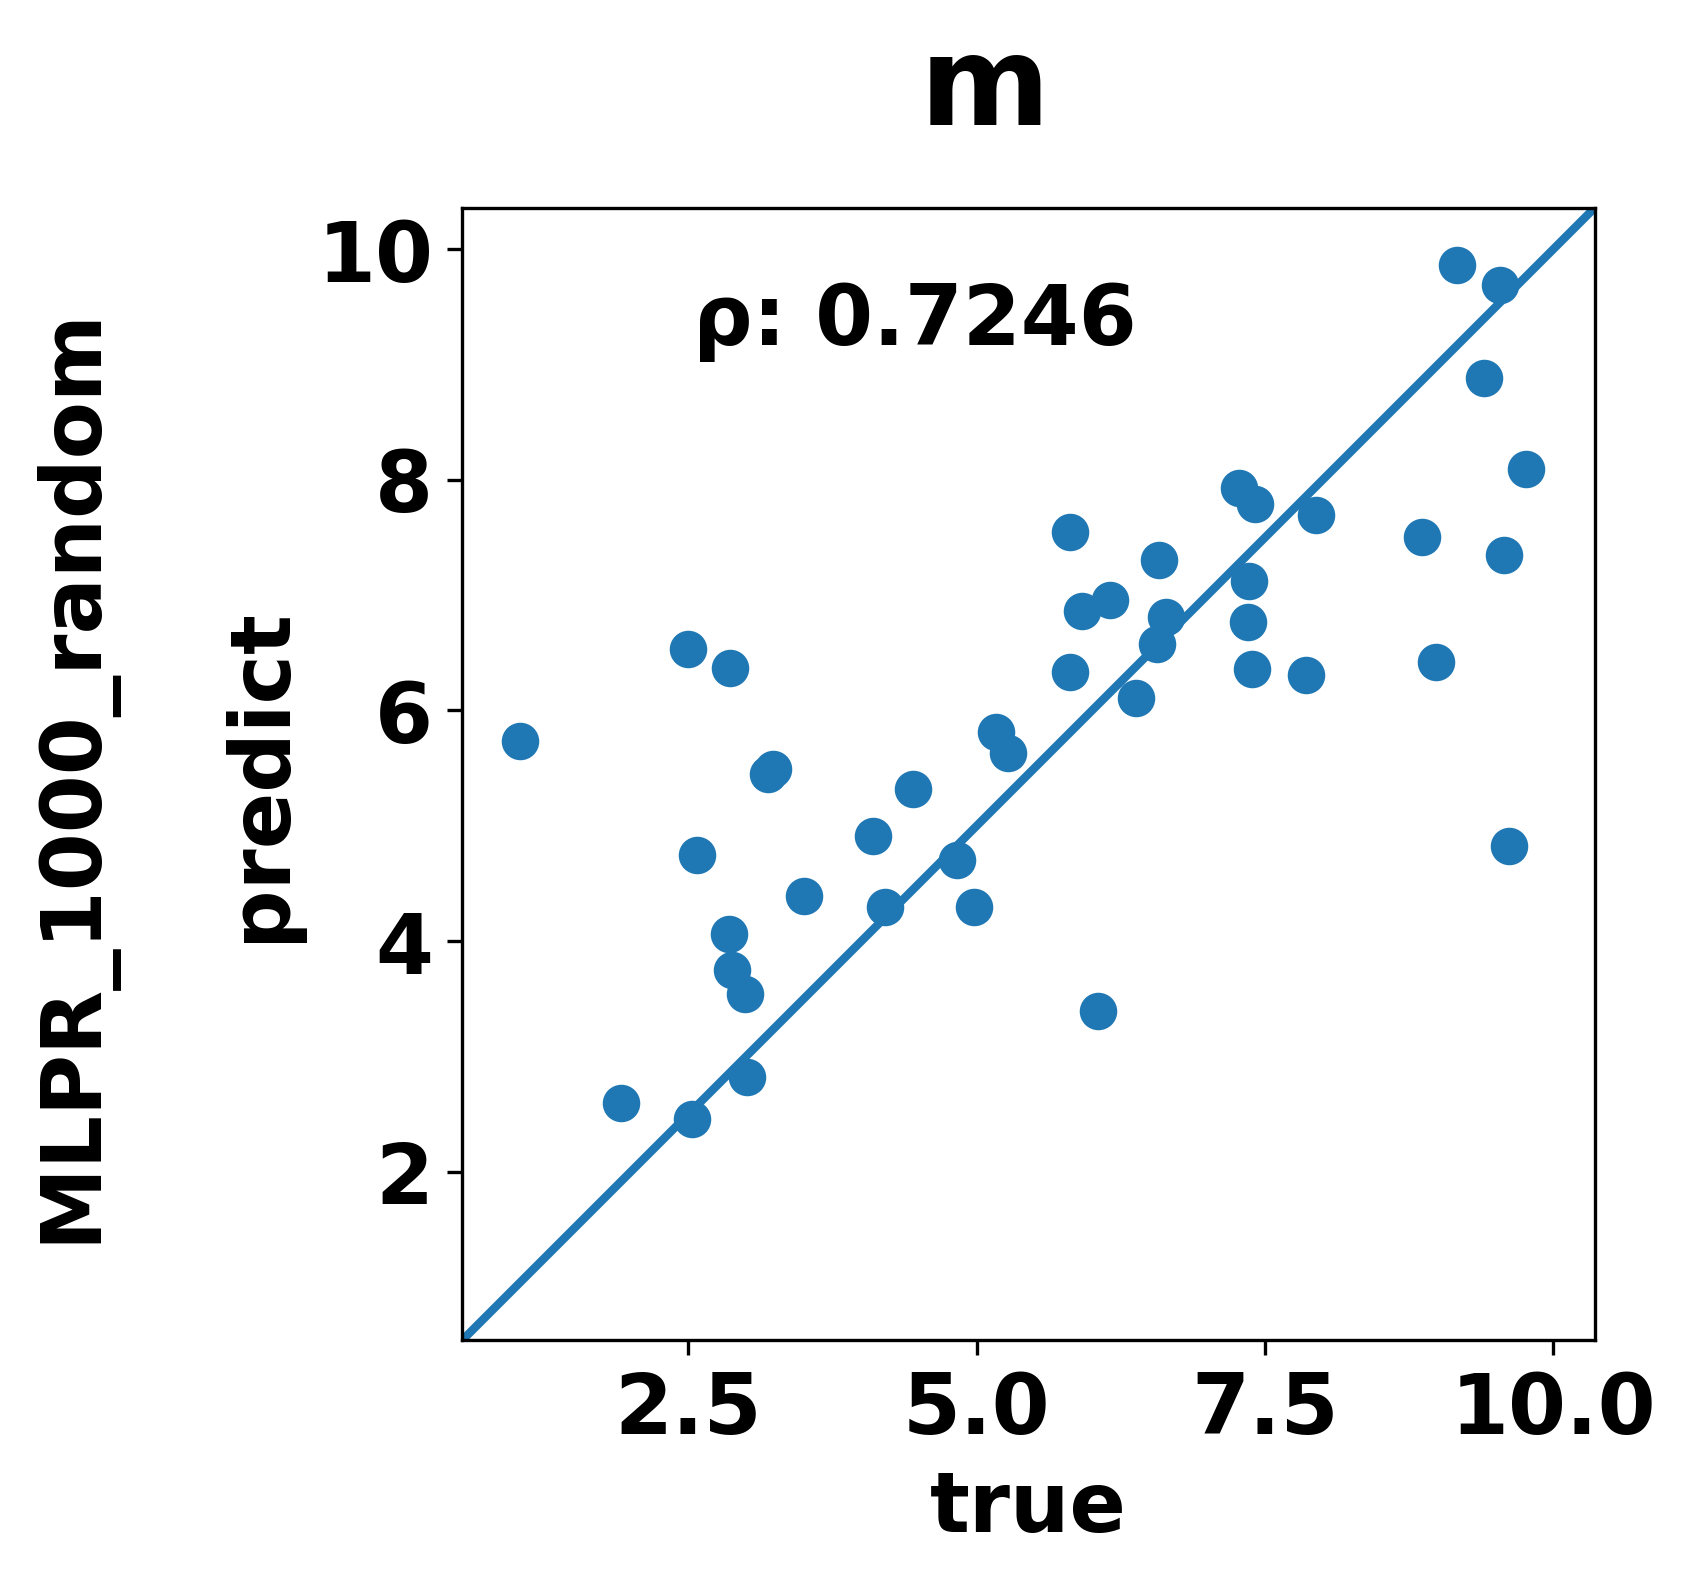

In [29]:
# Plot MLPR prediction, my theta=1 random MLPR trained on 5000 samples
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(5,5))
plot_accuracy_multi([mlpr_random_1[0]], test_dict, logs, params, size, title=" ", y_label="MLPR_1000_random", r2=False)

In [20]:
len(test_dict[0])

45

In [ ]:
# len(list_true)

In [ ]:
# list_true[0]

In [17]:
list_true_tuple = []
for i in list_true:
    j = [round(param, 3) for param in i]
    list_true_tuple.append(tuple(j))

In [ ]:
# for i in list_true_tuple:
#     print(i)

In [ ]:
# filter only the set in test_dict that is in results
# test_dict[0]
new_test_dict = {}
# dict_dadi_results --> list_true
for i in test_dict[0]:
    j = [round(param, 3) for param in i]
    if tuple(j) in list_true_tuple:
        new_test_dict[i] = test_dict[0][i]
    

In [ ]:
len(new_test_dict)

In [ ]:
for i in test_dict[0]:
    j = [round(param, 3) for param in i]
    print(j)

In [ ]:
list_mlpr = pickle.load(open('data/list_mlpr', 'rb'))

In [ ]:
len(list(test_dict[0].keys()))

In [ ]:
# Plot MLPR
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
logs = [True, True, False, False]
size = ((30, 20), (20,80), (8,2,20),(5,5))
plot_accuracy_multi([list_mlpr[2]], [new_test_dict], logs, params, size, title=" ", y_label="MLPR_1")

In [ ]:
new_test_dict